<div style="text-align:center; font-size:36px; font-weight:bold; color:#4A4A4A; background-color:#fff6e4; padding:10px; border:3px solid #f5ecda; border-radius:6px">
    Predicting Loan Defaults
    <p style="text-align:center; font-size:14px; font-weight:normal; color:#4A4A4A; margin-top:12px;">
        Author: Jens Bender <br> 
        February 2025
    </p>
</div>

<div style="background-color:#2c699d; color:white; padding:15px; border-radius:6px;">
    <h1 style="margin:0px">Project Overview</h1>
</div> 

**Summary**  
This project aims to develop a machine learning model to predict whether the customers of a financial institution will default on a loan based on data from their loan application. By accurately identifying potential defaulters, financial institutions can make more informed lending decisions, reduce losses, improve profitability, and increase operational efficiency through the automation of risk assessment.

**Problem**  
Predicting loan defaults is a challenging task due to the multitude of influencing factors such as customers' demographic, financial, location, and behavioral attributes. Traditional default prediction models often oversimplify complex relationships between customer features and default risk. Machine learning offers enhanced predictive capability by capturing non-linear patterns and intricate dependencies in loan application data, enabling more accurate predictions of loan default risk.

**Objectives**  
- Develop a machine learning model to predict loan defaults using customer data from loan applications.
- Compare multiple models (e.g., Logistic Regression, Random Forest, XGBoost) using a suitable evaluation metric (such as AUC-PR).
- Identify key factors influencing loan default risk through feature importance analysis.

**Value Proposition**  
This project enables financial institutions to reduce loan default rates and make better and faster lending decisions by leveraging machine learning for automated and improved risk assessment. 

**Business Goals**  
- Reduce losses by 5M-10M INR within 12 months of model deployment by decreasing the loan default rate by 10%-20%.
- Decrease loan processing time by 25%-40% by automating risk assessment, leading to less time spent on manual evaluations.
- Ensure 100% compliance with regulatory requirements and fair lending practices.

**Data**  
The dataset contains information provided by customers of a financial institution during the loan application process. It is sourced from the "Loan Prediction Based on Customer Behavior" dataset by Subham Jain, available on [Kaggle](https://www.kaggle.com/datasets/subhamjain/loan-prediction-based-on-customer-behavior). The dataset consists of three `.csv` files:
1. `Training Data.csv`: Contains the features, target variable (`Risk Flag`), and `ID` column from the training data. 
2. `Test Data.csv`: Contains the features and `ID` column from the test data.
3. `Sample Prediction Dataset.csv`: Contains the target variable (`Risk Flag`) and `ID` column from the test data. 

Dataset Statistics:
- Training set size: 252,000 records 
- Test set size: 28,000 records 
- Target variable: Risk flag (training: 12.3% defaults, test: 12.8% defaults)
- Features: 11 
  - Demographic: Age, married, profession
  - Financial: Income, house ownership, car ownership
  - Location: City, state
  - Behavioral: Experience, current job years, current house years

Data Overview Table:

| Column | Description | Storage Type | Semantic Type | Theoretical Range | Training Data Range |
| :--- | :--- | :--- | :--- | :--- | :--- |
| Risk Flag | Defaulted on loan (0: No, 1: Yes) | Integer | Categorical (Binary) | [0, 1] | [0, 1] |
| Income | Income of the applicant | Integer | Numerical | [0, ∞] | [10K, 10M] |
| Age | Age of the applicant (in years) | Integer | Numerical | [18, ∞] | [21, 79] |
| Experience | Work experience (in years) | Integer | Numerical | [0, ∞] | [0, 20] |
| Profession | Applicant's profession | String | Categorical (Nominal) | Any profession [e.g., "Architect", "Dentist"] | 51 unique professions |
| Married | Marital status | String | Categorical (Binary) | ["single", "married"] | ["single", "married"] |
| House Ownership | Applicant owns or rents a house | String | Categorical (Nominal) | ["rented", "owned", "norent_noown"] | ["rented", "owned", "norent_noown"] |
| Car Ownership | Whether applicant owns a car | String | Categorical (Binary) | ["yes", "no"] | ["yes", "no"] |
| Current Job Years | Years in the current job | Integer | Numerical | [0, ∞] | [0, 14] |
| Current House Years | Years in the current house | Integer | Numerical | [0, ∞] | [10, 14] |
| City | City of residence | String | Categorical (Nominal) | Any city [e.g., "Mumbai", "Bangalore"] | 317 unique cities |
| State | State of residence | String | Categorical (Nominal) | Any state [e.g., "Maharashtra", "Tamil_Nadu"] | 29 unique states |

Example Training Data:

| Risk Flag | Income    | Age | Experience | Profession         | Married | House Ownership | Car Ownership | Current Job Years | Current House Years | City      | State         |
| :-------- | :-------- | :-- | :--------- | :----------------- | :------ | :-------------- | :------------ | :---------------- | :------------------ | :-------- | :------------ |
| 0         | 1,303,834 | 23  | 3          | Mechanical_engineer | single  | rented          | no            | 3                 | 13                   | Rewa      | Madhya_Pradesh |
| 1         | 6,256,451 | 41  | 2          | Software_Developer | single  | rented          | yes           | 2                 | 12                   | Bangalore | Tamil_Nadu    |
| 0         | 3,991,815 | 66  | 4          | Technical_writer   | married | rented          | no            | 4                 | 10                   | Alappuzha | Kerala        |

**Technical Requirements**  
- Data Preprocessing:
  - Load, clean, transform, and save data using `pandas` and `sklearn`.
  - Handle duplicates, data types, missing values, and outliers.
  - Extract features, scale numerical features, and encode categorical features.
- Exploratory Data Analysis (EDA):
  - Analyze descriptive statistics using `pandas` and `numpy`.
  - Visualize distributions, correlations, and relationships using `seaborn` and `matplotlib`.
- Modeling:
  - Train baseline models and perform hyperparameter tuning for binary classification task with `sklearn` and `xgboost`.
  - Baseline models: Logistic Regression, Elastic Net Logistic Regression, K-Nearest Neighbors, Support Vector Machine, Decision Tree, Random Forest, Multi-Layer Perceptron, XGBoost.
  - Evaluate model performance using Area Under the Precision-Recall Curve (AUC-PR).
    - AUC-PR is more suitable to address class imbalance (12.3% defaults) with a focus on the positive class (preventing defaults) than accuracy, precision, recall, F1-score, and AUC-ROC.
    - Success criterion: Minimum AUC-PR of 0.70 on the test data.
  - Potentially use additional techniques to address class imbalance (e.g., SMOTE, class weights).
  - Visualize feature importance, show model prediction examples, and save the final model with `pickle`.
- Deployment:
  - Expose the final model via a REST API for easy integration with existing loan processing systems.
  - Implement efficient batch processing capabilities to handle up to 10K predictions in under 30 seconds.
  - Deploy using cloud infrastructure to ensure scalability and security.
  - Set up model performance monitoring and data drift detection.
- Stakeholders:
  - Loan officers: Direct users of the model predictions in day-to-day loan approvals.
  - Credit risk analysts: Provide subject matter expertise on loan default risk.
  - Compliance officers: Ensure the model complies with any legal and regulatory guidelines.
  - IT department: Manage the IT infrastructure and ensure data access for the model's development and deployment. 

By fulfilling these objectives and requirements, the project will provide a valuable tool for predicting loan defaults, thereby enhancing decision-making for financial institutions.

<div style="background-color:#2c699d; color:white; padding:15px; border-radius:6px;">
    <h1 style="margin:0px">Imports</h1>
</div>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import IsolationForest
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, auc, accuracy_score, precision_recall_fscore_support
from scipy.stats import randint, uniform
import os
import time
import pickle

<div style="background-color:#2c699d; color:white; padding:15px; border-radius:6px;">
    <h1 style="margin:0px">Data Loading and Inspection</h1>
</div>

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px"> 📌 Load data from the three <code>.csv</code> files into three Pandas DataFrames.</p>

In [ ]:
try:
    df_train = pd.read_csv("data/training_data.csv")
    X_test = pd.read_csv("data/test_data.csv")
    y_test = pd.read_csv("data/sample_prediction_dataset.csv")
    print("Data loaded successfully.")
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
except pd.errors.EmptyDataError:
    print("Error: The file is empty.")
except pd.errors.ParserError:
    print("Error: The file content could not be parsed as a CSV.")
except PermissionError:
    print("Error: Permission denied when accessing the file.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px"> 📌 Initial data inspection to understand the structure of the dataset and detect obvious issues.</p>

In [ ]:
# Show DataFrame info to check the number of rows and columns, data types and missing values
print("Training Data:")
print(df_train.info())
print("\nTest Data - Features:")
print(X_test.info())
print("\nTest Data - Target Variable:")
print(y_test.info())

In [ ]:
# Show top five rows of the training data
print("Training Data:")
df_train.head()

In [ ]:
# Show top five rows of the test data features
print("Test Data - Features:")
X_test.head()

In [ ]:
# Show top five rows of the test data target variable
print("Test Data - Target Variable:")
y_test.head()

<div style="background-color:#2c699d; color:white; padding:15px; border-radius:6px;">
    <h1 style="margin:0px">Data Preprocessing</h1>
</div> 

<div style="background-color:#3d7ab3; color:white; padding:12px; border-radius:6px;">
    <h2 style="margin:0px">Standardizing Names and Labels</h2>
</div> 

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px">
    <strong>Column Names</strong> <br> 
    📌 Convert all column names to snake_case for consistency, improved readability, and to minimize the risk of errors. This also resolves inconsistencies in column names between the training and test datasets (e.g., "Id" vs. "ID", "Risk_Flag" vs. "risk_flag").  
</p>

In [ ]:
# Convert column names to snake_case
df_train.columns = (
    df_train.columns
    .str.strip()  # Remove leading/trailing spaces
    .str.lower()  # Convert to lowercase
    .str.replace(r"[-/\s+]", "_", regex=True)  # Replace spaces and special characters with "_"
    .str.replace("_single", "")  # Shorten "married_single" to "married"
)

X_test.columns = (
    X_test.columns
    .str.strip()  
    .str.lower()  
    .str.replace(r"[-/\s+]", "_", regex=True) 
    .str.replace("_single", "") 
)

y_test.columns = (
    y_test.columns
    .str.strip()  
    .str.lower()  
    .str.replace(r"[-/\s+]", "_", regex=True)  
    .str.replace("_single", "") 
)

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px">
    <strong>Categorical Labels</strong> <br> 
    📌 Convert all categorical labels to snake_case for consistency, improved readability, and to minimize the risk of errors. This also resolves inconsistencies in the state names of the "state" column between the training and test datasets (e.g., "Uttar_Pradesh" vs. "Uttar Pradesh", "Jammu_and_Kashmir" vs. "Jammu and Kashmir"). 
</p>

In [ ]:
def standardize_categorical_labels(categorical_label):
    return (
        categorical_label
        .strip()  # Remove leading/trailing spaces
        .lower()  # Convert to lowercase
        .replace("-", "_")  # Replace hyphens with "_"
        .replace("/", "_")  # Replace slashes with "_"
        .replace(" ", "_")  # Replace spaces with "_"
    )


# Define categorical columns to standardize labels
columns_to_standardize = ["profession", "city", "state"]

# Apply standardization of categorical labels
for column in columns_to_standardize:
    df_train[column] = df_train[column].apply(standardize_categorical_labels)
    X_test[column] = X_test[column].apply(standardize_categorical_labels)

<div style="background-color:#3d7ab3; color:white; padding:12px; border-radius:6px;">
    <h2 style="margin:0px"> Merging Datasets</h2>
</div>

In [ ]:
# Merge X_test and y_test
df_test = pd.merge(X_test, y_test, on="id")

<div style="background-color:#3d7ab3; color:white; padding:12px; border-radius:6px;">
    <h2 style="margin:0px">Handling Duplicates</h2>
</div> 

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px"> 📌 Identify and remove duplicates based on all columns.</p>

In [ ]:
# Identify duplicates based on all columns
print("Training Data:")
print(df_train.duplicated().value_counts())
print("\nTest Data:")
print(df_test.duplicated().value_counts())

<p style="background-color:#f7fff8; padding:15px; border-width:3px; border-color:#e0f0e0; border-style:solid; border-radius:6px"> ✅ No duplicates were found based on all columns in both the training and test data.</p>

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px"> 📌 Identify and remove duplicates based on the ID column.</p>

In [ ]:
# Identify duplicates based on the ID column
print("Training Data:")
print(df_train.duplicated(subset=["id"]).value_counts())
print("\nTest Data:")
print(df_test.duplicated(subset=["id"]).value_counts())

<p style="background-color:#f7fff8; padding:15px; border-width:3px; border-color:#e0f0e0; border-style:solid; border-radius:6px"> ✅ No duplicates were found based on the ID column in both the training and test data.</p>

<div style="background-color:#3d7ab3; color:white; padding:12px; border-radius:6px;">
    <h2 style="margin:0px">Handling Data Types</h2>
</div> 

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px"> 📌 Identify and convert incorrect storage data types.</p>

In [ ]:
# Identify storage data types
print("Training Data:")
print(df_train.dtypes)
print("\nTest Data:")
print(df_test.dtypes)

<p style="background-color:#f7fff8; padding:15px; border-width:3px; border-color:#e0f0e0; border-style:solid; border-radius:6px"> ✅ No incorrect storage data types were found at first glance.</p>

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px"> 📌 Identify object columns with two unique categories and convert them to boolean columns.</p>

In [ ]:
# Identify object columns with two unique categories 
print("Training Data:")
print(df_train[df_train.select_dtypes(include=["object"]).columns.tolist()].nunique())
print("\nTest Data:")
print(df_test[df_test.select_dtypes(include=["object"]).columns.tolist()].nunique())

In [ ]:
# Convert married and car_ownership column from object to boolean
df_train["married"] = df_train["married"].map({"married": True, "single": False})
df_test["married"] = df_test["married"].map({"married": True, "single": False})
df_train["car_ownership"] = df_train["car_ownership"].map({"yes": True, "no": False})
df_test["car_ownership"] = df_test["car_ownership"].map({"yes": True, "no": False})

<div style="background-color:#3d7ab3; color:white; padding:12px; border-radius:6px;">
    <h2 style="margin:0px">Train-Validation-Test Split</h2>
</div>

<div style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px">
📌 The dataset is initially divided into a training set (90%) and a test set (10%). Split the training set further to achieve the following train-validation-test split:
    
<table style="margin-left:0; margin-top:20px; margin-bottom:20px">
    <tr>
        <th style="background-color:#f5ecda;">Data</th>
        <th style="background-color:#f5ecda;">Size (%)</th>
        <th style="background-color:#f5ecda;">Size (Total)</th>
    </tr>
    <tr>
        <td style="background-color:#fff6e4;">Training Set</td>
        <td style="background-color:#fff6e4;">80%</td>
        <td style="background-color:#fff6e4;">224,000</td>
    </tr>
    <tr>
        <td style="background-color:#f5ecda;">Validation Set</td>
        <td style="background-color:#f5ecda;">10%</td>
        <td style="background-color:#f5ecda;">28,000</td>
    </tr>
    <tr>
        <td style="background-color:#fff6e4;">Test Set</td>
        <td style="background-color:#fff6e4;">10%</td>
        <td style="background-color:#fff6e4;">28,000</td>
    </tr>
</table>
This results in 80% of the total data being used for training, 10% for validation, and 10% for testing, while keeping the original test set size unchanged.
</div>

In [ ]:
# Split the data into X features and y target
X_train = df_train.drop("risk_flag", axis=1)
y_train = df_train["risk_flag"]
X_test = df_test.drop("risk_flag", axis=1)
y_test = df_test["risk_flag"]

In [ ]:
# Split the training set further into training and validation sets (validation set size same as test set size)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=X_test.shape[0]/df_train.shape[0], random_state=42)

<div style="background-color:#3d7ab3; color:white; padding:12px; border-radius:6px;">
    <h2 style="margin:0px">Engineering New Features</h2>
</div> 

In [ ]:
# Explore number of unique categories in categorical columns
print("Training Data:")
print(X_train[["house_ownership", "profession", "city", "state"]].nunique())
print("\nValidation Data:")
print(X_val[["house_ownership", "profession", "city", "state"]].nunique())
print("\nTest Data:")
print(X_test[["house_ownership", "profession", "city", "state"]].nunique())

<div style="background-color:#4e8ac8; color:white; padding:10px; border-radius:6px;">
    <h3 style="margin:0px">Profession-Based Features</h3>
</div>

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px">
    <strong>Job Stability</strong> <br>
    📌 Derive job stability from profession.
</p> 

In [ ]:
def derive_job_stability(profession):
    job_stability_map = {
        # Government and highly regulated roles with exceptional job security
        "civil_servant": "very_stable",
        "army_officer": "very_stable",
        "police_officer": "very_stable",
        "magistrate": "very_stable",
        "official": "very_stable",
        "air_traffic_controller": "very_stable",
        "firefighter": "very_stable",
        "librarian": "very_stable",
        
        # Licensed/regulated professionals with strong job security
        "physician": "stable",
        "surgeon": "stable",
        "dentist": "stable",
        "chartered_accountant": "stable",
        "civil_engineer": "stable",
        "mechanical_engineer": "stable",
        "chemical_engineer": "stable",
        "petroleum_engineer": "stable",
        "biomedical_engineer": "stable",
        "engineer": "stable",
        
        # Corporate roles with steady demand
        "software_developer": "moderate",
        "computer_hardware_engineer": "moderate",
        "financial_analyst": "moderate",
        "industrial_engineer": "moderate",
        "statistician": "moderate",
        "microbiologist": "moderate",
        "scientist": "moderate",
        "geologist": "moderate",
        "economist": "moderate",
        "technology_specialist": "moderate",
        "design_engineer": "moderate",
        "architect": "moderate",
        "surveyor": "moderate",
        "secretary": "moderate",
        "flight_attendant": "moderate",
        "hotel_manager": "moderate",
        "computer_operator": "moderate",
        "technician": "moderate",
        
        # Project-based or variable demand roles
        "web_designer": "variable",
        "fashion_designer": "variable",
        "graphic_designer": "variable",
        "designer": "variable",
        "consultant": "variable",
        "technical_writer": "variable",
        "artist": "variable",
        "comedian": "variable",
        "chef": "variable",
        "analyst": "variable",
        "psychologist": "variable",
        "drafter": "variable",
        "aviator": "variable",
        "politician": "variable",
        "lawyer": "variable"
    }

    # Return the job stability score based on the profession (default to "moderate" for unknown categories)
    return job_stability_map.get(profession, "moderate")
    
# Apply function to create job stability feature in training, validation, and test data
X_train["job_stability"] = X_train["profession"].map(derive_job_stability)
X_val["job_stability"] = X_val["profession"].map(derive_job_stability)
X_test["job_stability"] = X_test["profession"].map(derive_job_stability)

<div style="background-color:#4e8ac8; color:white; padding:10px; border-radius:6px;">
    <h3 style="margin:0px">Location-Based Features</h3>
</div> 

<div style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px"> 
    <strong>City Tier</strong> </br>
    📌 Derive city tier from city. Specifically, categorize cities into three tiers that reflect differences in employment opportunities, income levels, cost of living, population densitiy, and economic activity.
<ul>
  <li>Tier 1: Large metropolitan cities with high population density, significant economic activity, and robust infrastructure. India's most developed and urbanized cities.</li>
  <li>Tier 2: Medium-sized cities with growing industries, regional importance, and moderate economic activity. Less urbanized than Tier 1.</li>
  <li>Tier 3: Smaller cities or towns with limited industrial and economic activity, often rural or semi-urban areas.</li>
</ul>
</div> 

In [ ]:
def derive_city_tier(city):
    tier_map = {
        # Tier 1 cities
        "new_delhi": "tier_1",
        "navi_mumbai": "tier_1",
        "kolkata": "tier_1",
        "bangalore": "tier_1",
        "chennai": "tier_1",
        "hyderabad": "tier_1",
        "mumbai": "tier_1",
        "pune": "tier_1",
        "ahmedabad": "tier_1",
        "jaipur": "tier_1",
        "lucknow": "tier_1",
        "noida": "tier_1",
        "coimbatore": "tier_1",
        "surat": "tier_1",
        "nagpur": "tier_1",
        "kochi": "tier_1",
        "thiruvananthapuram": "tier_1",
        "kanpur": "tier_1",
        "patna": "tier_1",
        
        # Tier 2 cities
        "bhopal": "tier_2",
        "vijayawada": "tier_2",
        "indore": "tier_2",
        "jodhpur": "tier_2",
        "vadodara": "tier_2",
        "ludhiana": "tier_2",
        "madurai": "tier_2",
        "agra": "tier_2",
        "mysore[7][8][9]": "tier_2",
        "rajkot": "tier_2",
        "nashik": "tier_2",
        "amritsar": "tier_2",
        "ranchi": "tier_2",
        "chandigarh_city": "tier_2",
        "allahabad": "tier_2",
        "bhubaneswar": "tier_2",
        "varanasi": "tier_2",
        "jabalpur": "tier_2",
        "guwahati": "tier_2",
        "tiruppur": "tier_2",
        "raipur": "tier_2",
        "udaipur": "tier_2",
        "gwalior": "tier_2",
        
        # Tier 3 cities
        "vijayanagaram": "tier_3",
        "bulandshahr": "tier_3",
        "saharsa[29]": "tier_3",
        "hajipur[31]": "tier_3",
        "satara": "tier_3",
        "ongole": "tier_3",
        "bellary": "tier_3",
        "giridih": "tier_3",
        "hospet": "tier_3",
        "khammam": "tier_3",
        "danapur": "tier_3",
        "bareilly": "tier_3",
        "satna": "tier_3",
        "howrah": "tier_3",
        "thanjavur": "tier_3",
        "farrukhabad": "tier_3",
        "buxar[37]": "tier_3",
        "arrah": "tier_3",
        "thrissur": "tier_3",
        "proddatur": "tier_3",
        "bahraich": "tier_3",
        "nandyal": "tier_3",
        "siwan[32]": "tier_3",
        "barasat": "tier_3",
        "dhule": "tier_3",
        "begusarai": "tier_3",
        "khandwa": "tier_3",
        "guntakal": "tier_3",
        "latur": "tier_3",
        "karaikudi": "tier_3"
    }
    
    # Return city tier based on the city (default to "unknown" for unknown categories)
    return tier_map.get(city, "unknown")

# Apply function to create city tier feature in training, validation, and test data
X_train["city_tier"] = X_train["city"].map(derive_city_tier)
X_val["city_tier"] = X_val["city"].map(derive_city_tier)
X_test["city_tier"] = X_test["city"].map(derive_city_tier)

<div style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px"> 
    <strong>State Default Rate</strong> </br>
    📌 Derive state default rate from state using target encoding.
</div> 

In [ ]:
# Merge X_train and y_train
df_train = pd.concat([X_train, y_train], axis=1)

# Calculate default rate by state based on the training data
default_rate_by_state = df_train.groupby("state")["risk_flag"].mean()

# Create state default rate feature in training, validation, and test data by replacing the state with its corresponding default rate
X_train["state_default_rate"] = X_train["state"].map(default_rate_by_state)
X_val["state_default_rate"] = X_val["state"].map(default_rate_by_state)
X_test["state_default_rate"] = X_test["state"].map(default_rate_by_state)

<div style="background-color:#3d7ab3; color:white; padding:12px; border-radius:6px;">
    <h2 style="margin:0px">Defining Semantic Type</h2>
</div>

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px"> 📌 Define semantic column types (numerical, categorical, boolean) for downstream tasks like additional preprocessing steps, exploratory data analysis, and machine learning.</p> 

In [ ]:
# Define semantic column types manually
numerical_columns = ["income", "age", "experience", "current_job_yrs", "current_house_yrs", "state_default_rate"]
categorical_columns = ["house_ownership", "job_stability", "city_tier", "profession", "city", "state"]
boolean_columns = ["risk_flag", "married", "car_ownership"]

<div style="background-color:#3d7ab3; color:white; padding:12px; border-radius:6px;">
    <h2 style="margin:0px">Handling Missing Values</h2>
</div> 

In [ ]:
# Identify missing values
print("Training Data - Features:")
print(X_train.isnull().sum())
print("\nTraining Data - Target Variable:")
print(y_train.isnull().sum())

print("\nValidation Data - Features:")
print(X_val.isnull().sum())
print("\nValidation Data - Target Variable:")
print(y_val.isnull().sum())

print("\nTest Data - Features:")
print(X_test.isnull().sum())
print("\nTest Data - Target Variable:")
print(y_test.isnull().sum())

<p style="background-color:#f7fff8; padding:15px; border-width:3px; border-color:#e0f0e0; border-style:solid; border-radius:6px"> ✅ No missing values were found in any of the columns in the training, validation, and test data.</p>

<div style="background-color:#3d7ab3; color:white; padding:12px; border-radius:6px;">
    <h2 style="margin:0px">Handling Outliers</h2>
</div>

<div style="background-color:#4e8ac8; color:white; padding:10px; border-radius:6px;">
    <h3 style="margin:0px">3SD Method</h3>
</div>

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px"> 📌 Identify and remove univariate outliers in numerical columns by applying the 3 standard deviation (SD) rule. Specifically, a data point is considered an outlier if it falls more than 3 standard deviations above or below the mean of the column.</p> 

In [ ]:
# Create a custom transformer class to identify and remove outliers using the 3SD method
class OutlierRemover3SD(BaseEstimator, TransformerMixin):
    def fit(self, df, numerical_columns):
        # Convert single column string to list
        if isinstance(numerical_columns, str):
            self.numerical_columns_ = [numerical_columns]
        else:
            self.numerical_columns_ = numerical_columns
            
        # Calculate statistics (mean, standard deviation, cutoff values) for each column
        self.stats_ = pd.DataFrame(index=self.numerical_columns_)
        self.stats_["mean"] = df[self.numerical_columns_].mean()
        self.stats_["sd"] = df[self.numerical_columns_].std()
        self.stats_["lower_cutoff"] = self.stats_["mean"] - 3 * self.stats_["sd"]
        self.stats_["upper_cutoff"] = self.stats_["mean"] + 3 * self.stats_["sd"]
        
        # Create masks for filtering outliers 
        self.masks_ = (df[self.numerical_columns_] >= self.stats_["lower_cutoff"]) & (df[self.numerical_columns_] <= self.stats_["upper_cutoff"])  # masks by column
        self.final_mask_ = self.masks_.all(axis=1)  # single mask across all columns
     
        # Calculate number of outliers
        self.stats_["outliers"] = (~self.masks_).sum()  # by column
        self.outliers_ = (~self.final_mask_).sum()  # across all columns
        
        return self

    def transform(self, df):
        # Create masks for new df
        self.masks_ = (df[self.numerical_columns_] >= self.stats_["lower_cutoff"]) & (df[self.numerical_columns_] <= self.stats_["upper_cutoff"])  # masks by column
        self.final_mask_ = self.masks_.all(axis=1)  # single mask across all columns
        
        # Remove outliers based on the final mask
        return df[self.final_mask_]

    def fit_transform(self, df, numerical_columns):
        # Perform both fit and transform 
        return self.fit(df, numerical_columns).transform(df)


# Initialize outlier remover 
outlier_remover_3sd = OutlierRemover3SD()

# Fit outlier remover to training data
outlier_remover_3sd.fit(X_train, numerical_columns)

# Show outliers in training data
print(f"Training data: Identified {outlier_remover_3sd.outliers_} rows ({outlier_remover_3sd.outliers_ / len(outlier_remover_3sd.final_mask_) * 100:.1f}%) with outliers.")
print("Statistics and outliers by column:")
round(outlier_remover_3sd.stats_, 2)

In [ ]:
# Remove outliers
X_train_no_outliers = outlier_remover_3sd.transform(X_train)
print(f"Training Data: Removed {(~outlier_remover_3sd.final_mask_).sum()} rows ({(~outlier_remover_3sd.final_mask_).sum() / len(outlier_remover_3sd.final_mask_) * 100:.1f}%) with outliers.")
X_val_no_outliers = outlier_remover_3sd.transform(X_val)
print(f"Validation Data: Removed {(~outlier_remover_3sd.final_mask_).sum()} rows ({(~outlier_remover_3sd.final_mask_).sum() / len(outlier_remover_3sd.final_mask_) * 100:.1f}%) with outliers.")
X_test_no_outliers = outlier_remover_3sd.transform(X_test)
print(f"Test Data: Removed {(~outlier_remover_3sd.final_mask_).sum()} rows ({(~outlier_remover_3sd.final_mask_).sum() / len(outlier_remover_3sd.final_mask_) * 100:.1f}%) with outliers.")

<div style="background-color:#4e8ac8; color:white; padding:10px; border-radius:6px;">
    <h3 style="margin:0px">1.5 IQR Method </h3>
</div> 

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px"> 📌 Identify and remove univariate outliers in numerical columns using the 1.5 interquartile range (IQR) rule. Specifically, a data point is considered an outlier if it falls more than 1.5 interquartile ranges above the third quartile (Q3) or below the first quartile (Q1) of the column.</p> 

In [ ]:
# Create a custom transformer class to identify and remove outliers using the 1.5 IQR method
class OutlierRemoverIQR(BaseEstimator, TransformerMixin):
    def fit(self, df, numerical_columns):
        # Convert single column string to list
        if isinstance(numerical_columns, str):
            self.numerical_columns_ = [numerical_columns]
        else:
            self.numerical_columns_ = numerical_columns
        
        # Calculate statistics (first quartile, third quartile, interquartile range, cutoff values) for each column
        self.stats_ = pd.DataFrame(index=self.numerical_columns_)
        self.stats_["Q1"] = df[self.numerical_columns_].quantile(0.25)
        self.stats_["Q3"] = df[self.numerical_columns_].quantile(0.75)
        self.stats_["IQR"] = self.stats_["Q3"] - self.stats_["Q1"]
        self.stats_["lower_cutoff"] = self.stats_["Q1"] - 1.5 * self.stats_["IQR"]
        self.stats_["upper_cutoff"] = self.stats_["Q3"] + 1.5 * self.stats_["IQR"]

        # Create masks for filtering outliers 
        self.masks_ = (df[self.numerical_columns_] >= self.stats_["lower_cutoff"]) & (df[self.numerical_columns_] <= self.stats_["upper_cutoff"])  # masks by column
        self.final_mask_ = self.masks_.all(axis=1)  # single mask across all columns

        # Calculate number of outliers
        self.stats_["outliers"] = (~self.masks_).sum()  # by column
        self.outliers_ = (~self.final_mask_).sum()  # across all columns
               
        return self

    def transform(self, df):
        # Create masks for new df
        self.masks_ = (df[self.numerical_columns_] >= self.stats_["lower_cutoff"]) & (df[self.numerical_columns_] <= self.stats_["upper_cutoff"])  # masks by column
        self.final_mask_ = self.masks_.all(axis=1)  # single mask across all columns
        
        # Remove outliers based on the final mask
        return df[self.final_mask_]

    def fit_transform(self, df, numerical_columns):
        # Perform both fit and transform
        return self.fit(df, numerical_columns).transform(df)


# Initialize outlier remover 
outlier_remover_iqr = OutlierRemoverIQR()

# Fit outlier remover to training data
outlier_remover_iqr.fit(X_train, numerical_columns)

# Show outliers by column for training data
print(f"Training data: Identified {outlier_remover_iqr.outliers_} rows ({outlier_remover_iqr.outliers_ / len(outlier_remover_iqr.final_mask_) * 100:.1f}%) with outliers.")
print("Statistics and outliers by column:")
round(outlier_remover_iqr.stats_, 2)

In [ ]:
# Show default rate by state
default_rate_by_state.sort_values()

In [ ]:
# Remove outliers
X_train_no_outliers = outlier_remover_iqr.transform(X_train)
print(f"Training Data: Removed {(~outlier_remover_iqr.final_mask_).sum()} rows ({(~outlier_remover_iqr.final_mask_).sum() / len(outlier_remover_iqr.final_mask_) * 100:.1f}%) with outliers.")
X_val_no_outliers = outlier_remover_iqr.transform(X_val)
print(f"Validation Data: Removed {(~outlier_remover_iqr.final_mask_).sum()} rows ({(~outlier_remover_iqr.final_mask_).sum() / len(outlier_remover_iqr.final_mask_) * 100:.1f}%) with outliers.")
X_test_no_outliers = outlier_remover_iqr.transform(X_test)
print(f"Test Data: Removed {(~outlier_remover_iqr.final_mask_).sum()} rows ({(~outlier_remover_iqr.final_mask_).sum() / len(outlier_remover_iqr.final_mask_) * 100:.1f}%) with outliers.")

<div style="background-color:#4e8ac8; color:white; padding:10px; border-radius:6px;">
    <h3 style="margin:0px">Isolation Forest</h3>
</div> 

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px">📌 Identify and remove multivariate outliers using the isolation forest algorithm.</p> 

In [ ]:
# Initialize isolation forest
isolation_forest = IsolationForest(contamination=0.05, random_state=42)

# Create list of numerical and boolean features (without the target variable "risk_flag")
numerical_boolean_features = numerical_columns + ["married", "car_ownership"]

# Fit isolation forest on training data
isolation_forest.fit(X_train[numerical_boolean_features])

# Predict outliers on training, validation, and test data
X_train["outlier"] = isolation_forest.predict(X_train[numerical_boolean_features])
X_train["outlier_score"] = isolation_forest.decision_function(X_train[numerical_boolean_features])
X_val["outlier"] = isolation_forest.predict(X_val[numerical_boolean_features])
X_val["outlier_score"] = isolation_forest.decision_function(X_val[numerical_boolean_features])
X_test["outlier"] = isolation_forest.predict(X_test[numerical_boolean_features])
X_test["outlier_score"] = isolation_forest.decision_function(X_test[numerical_boolean_features])

# Show number of outliers
n_outliers_train = X_train["outlier"].value_counts()[-1]
contamination_train = X_train["outlier"].value_counts()[-1] / X_train["outlier"].value_counts().sum()
print(f"Training Data: Identified {n_outliers_train} rows ({100 * contamination_train:.1f}%) as multivariate outliers.")

n_outliers_val = X_val["outlier"].value_counts()[-1]
contamination_val = X_val["outlier"].value_counts()[-1] / X_val["outlier"].value_counts().sum()
print(f"Validation Data: Identified {n_outliers_val} rows ({100 * contamination_val:.1f}%) as multivariate outliers.")

n_outliers_test = X_test["outlier"].value_counts()[-1]
contamination_test = X_test["outlier"].value_counts()[-1] / X_test["outlier"].value_counts().sum()
print(f"Test Data: Identified {n_outliers_test} rows ({100 * contamination_test:.1f}%) as multivariate outliers.")

In [ ]:
# Scatter plot matrix to visualize outliers for a subsample of the training data
X_train_subsample = X_train[numerical_boolean_features + ["outlier"]].sample(n=1000, random_state=42)
sns.pairplot(X_train_subsample, hue="outlier", palette={1: "#4F81BD", -1: "#D32F2F"}, plot_kws={"alpha":0.6, "s":40})

In [ ]:
# Remove outliers
X_train_no_outliers = X_train[X_train["outlier"] == 1]
print(f"Training Data: Removed {X_train[X_train['outlier'] == -1].shape[0]} rows ({X_train[X_train['outlier'] == -1].shape[0] / X_train.shape[0] * 100:.1f}%) with multivariate outliers.") 
X_val_no_outliers = X_val[X_val["outlier"] == 1]
print(f"Validation Data: Removed {X_val[X_val['outlier'] == -1].shape[0]} rows ({X_val[X_val['outlier'] == -1].shape[0] / X_val.shape[0] * 100:.1f}%) with multivariate outliers.") 
X_test_no_outliers = df_test[X_test["outlier"] == 1]
print(f"Test Data: Removed {X_test[X_test['outlier'] == -1].shape[0]} rows ({X_test[X_test['outlier'] == -1].shape[0] / X_test.shape[0] * 100:.1f}%) with multivariate outliers.") 

<div style="background-color:#3d7ab3; color:white; padding:12px; border-radius:6px;">
    <h2 style="margin:0px">Feature Scaling and Encoding</h2>
</div>

<div style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px"> 
📌 Use a <code>ColumnTransformer</code> to preprocess columns based on their semantic type. This allows the appropriate transformation to each semantic column type in a single step.
<ul>
  <li>Scale numerical columns: <code>StandardScaler</code> to transform numerical columns to have mean = 0 and standard deviation = 1.</li>
  <li>Encode categorical columns:</li>
    <ul>
      <li>Nominal columns (unordered categories): <code>OneHotEncoder</code> to convert string categories into binary (one-hot) encoded columns.</li>
      <li>Ordinal columns (ordered categories): <code>OrdinalEncoder</code> to convert string categories into integers.</li>
    </ul>
  <li>Retain boolean columns: Pass through boolean columns unchanged using <code>remainder="passthrough"</code>.</li>
</ul>
</div> 

In [ ]:
# Define nominal and ordinal columns
nominal_columns = ["house_ownership"]
ordinal_columns = ["job_stability", "city_tier"]

# Define the explicit order of categories for all ordinal columns
ordinal_column_orders = [
    ["variable", "moderate", "stable", "very_stable"],  # Order for job_stability
    ["unknown", "tier_3", "tier_2", "tier_1"]  # Order for city_tier
]

# Initialize a column transformer 
column_transformer = ColumnTransformer(
    transformers=[
        ("scaler", StandardScaler(), numerical_columns), 
        ("nominal_encoder", OneHotEncoder(drop="first"), nominal_columns),
        ("ordinal_encoder", OrdinalEncoder(categories=ordinal_column_orders), ordinal_columns)  
    ],
    remainder="passthrough" 
)

# Fit column transformer on the training data 
column_transformer.fit(X_train)

# Apply feature scaling and encoding to training, validation and test data
X_train_transformed = column_transformer.transform(X_train)
X_val_transformed = column_transformer.transform(X_val)
X_test_transformed = column_transformer.transform(X_test)

# Get transformed column names
nominal_encoded_columns = list(column_transformer.named_transformers_["nominal_encoder"].get_feature_names_out())
passthrough_columns = list(X_train.columns.difference(numerical_columns + nominal_columns + ordinal_columns, sort=False))
transformed_columns = numerical_columns + nominal_encoded_columns + ordinal_columns + passthrough_columns

# Convert transformed data from arrays to DataFrames with column names 
X_train_transformed = pd.DataFrame(X_train_transformed, columns=transformed_columns)
X_val_transformed = pd.DataFrame(X_val_transformed, columns=transformed_columns)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=transformed_columns)

# Convert transformed data types
X_train_transformed[numerical_columns] = X_train_transformed[numerical_columns].astype(float)
X_train_transformed[nominal_encoded_columns + ordinal_columns + ["married", "car_ownership"]] = X_train_transformed[nominal_encoded_columns + ordinal_columns + ["married", "car_ownership"]].astype(int)
X_val_transformed[numerical_columns] = X_val_transformed[numerical_columns].astype(float)
X_val_transformed[nominal_encoded_columns + ordinal_columns + ["married", "car_ownership"]] = X_val_transformed[nominal_encoded_columns + ordinal_columns + ["married", "car_ownership"]].astype(int)
X_test_transformed[numerical_columns] = X_test_transformed[numerical_columns].astype(float)
X_test_transformed[nominal_encoded_columns + ordinal_columns + ["married", "car_ownership"]] = X_test_transformed[nominal_encoded_columns + ordinal_columns + ["married", "car_ownership"]].astype(int)

# Reset the index to match the untransformed DataFrames
X_train_transformed.index = X_train_transformed["id"] - 1
X_val_transformed.index = X_val_transformed["id"] - 1
X_test_transformed.index = X_test_transformed["id"] - 1

<div style="background-color:#3d7ab3; color:white; padding:12px; border-radius:6px;">
    <h2 style="margin:0px">Saving Data</h2>
</div> 

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px">📌 Save preprocessed data from a Pandas DataFrame to a <code>.csv</code> file in the <code>data</code> directory.</p> 

In [ ]:
# Create "data" directory if it doesn't exist
os.makedirs("data", exist_ok=True)

# Merge transformed X features and y target variable
df_train_transformed = pd.concat([X_train_transformed, y_train], axis=1)
df_val_transformed = pd.concat([X_val_transformed, y_val], axis=1)
df_test_transformed = pd.concat([X_test_transformed, y_test], axis=1)

# Save as .csv  
df_train_transformed.to_csv("data/training_data_preprocessed.csv", index=False)
df_val_transformed.to_csv("data/validation_data_preprocessed.csv", index=False)
df_test_transformed.to_csv("data/test_data_preprocessed.csv", index=False)

<div style="background-color:#2c699d; color:white; padding:15px; border-radius:6px;">
    <h1 style="margin:0px">Exploratory Data Analysis (EDA)</h1>
</div>  

<div style="background-color:#3d7ab3; color:white; padding:12px; border-radius:6px;">
    <h2 style="margin:0px">Univariate EDA</h2>
</div>

<div style="background-color:#e8f4fd; padding:15px; border:3px solid #d0e7fa; border-radius:6px;">
    ℹ️ Analyze the distribution of a single column using descriptive statistics and visualizations.
</div>

<div style="background-color:#4e8ac8; color:white; padding:10px; border-radius:6px;">
    <h3 style="margin:0px">Numerical Columns</h3>
</div> 

<div style="background-color:#e8f4fd; padding:15px; border:3px solid #d0e7fa; border-radius:6px;">
    ℹ️ Examine descriptive statistics (e.g., mean, median, standard deviation) and visualize the distributions (e.g., histograms) of numerical columns.
</div>

<div style="background-color:#fff6e4; padding:15px; border:3px solid #f5ecda; border-radius:6px;">
    <strong>Descriptive Statistics</strong> <br>
    📌 Examine descriptive statistics of numerical columns. 
</div>

In [ ]:
# Table of descriptive statistics
pd.set_option("display.float_format", "{:,.2f}".format)
X_train[numerical_columns].describe().transpose()

<div style="background-color:#fff6e4; padding:15px; border:3px solid #f5ecda; border-radius:6px;">
    <strong>Visualize Distributions</strong> <br> 
    📌 Histogram matrix that shows the distribution of all 6 numerical columns in a 2x3 matrix.
</div>

In [ ]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Iterate over all numerical columns
for i, column in enumerate(numerical_columns):
    # Create a subplot in a 2x3 grid (current subplot i+1 because subplot indices start at 1)
    plt.subplot(2, 3, i + 1)
    
    # Create histogram for the current column
    sns.histplot(X_train[column])
    
    # Add title and axes labels
    plt.title(column.title())
    plt.ylabel("Frequency")
    plt.xlabel("")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px">📌 Customize the histograms of income, current job years, and state default rate for better interpretability.</p> 

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px"><b>Income</b>: Format histogram x-axis tick labels in millions (M).</p> 

In [ ]:
# Imports
from matplotlib.ticker import FuncFormatter

# Histogram 
sns.histplot(X_train["income"])

# Add title and axes labels 
plt.title("Income")
plt.ylabel("Frequency")
plt.xlabel("")
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x / 1000000:.0f}M"))   # Format the x-axis tick labels in millions

# Show the plot
plt.show()

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px"><b>Current Job Years</b>: Set histogram x-axis tick labels from 0 to 14 in steps of 1.</p> 

In [ ]:
# Histogram 
sns.histplot(X_train["current_job_yrs"])

# Add title and axes labels 
plt.title("Current Job Years")
plt.ylabel("Frequency")
plt.xlabel("")
plt.xticks(np.arange(0, 15, 1))  # Set x-axis tick labels from 0 to 14 in steps of 1

# Show the plot
plt.show()

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px"><b>State Default Rate</b>: Format histogram x-axis tick labels in %.</p>

In [ ]:
# Histogram 
sns.histplot(X_train["state_default_rate"])

# Add title and axes labels 
plt.title("State Default Rate")
plt.ylabel("Frequency")
plt.xlabel("")
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x * 100:.1f}%"))   # Format the x-axis tick labels in %

# Show the plot
plt.show()

<div style="background-color:#4e8ac8; color:white; padding:10px; border-radius:6px;">
    <h3 style="margin:0px">Categorical Columns</h3>
</div> 

<div style="background-color:#e8f4fd; padding:15px; border:3px solid #d0e7fa; border-radius:6px;">
    ℹ️ Examine descriptive statistics (absolute and relative frequencies) and visualize the distributions (e.g., bar plots) of categorical columns.
</div>

<div style="background-color:#fff6e4; padding:15px; border:3px solid #f5ecda; border-radius:6px;">
    <strong>Descriptive Statistics</strong> <br> 
    📌 Calculate and show the absolute and relative frequencies of all categorical and boolean columns.
</div>

In [ ]:
# Merge X_train and y_train to have all categorical columns (including features and target variable) in a single DataFrame
df_train = pd.concat([X_train, y_train], axis=1)


# Function to create frequency tables for all categorical columns 
def calculate_frequencies(df, categorical_columns):
    # Initialize dictionary to store all frequency tables 
    frequencies = {}
    for column in categorical_columns:
        # Calculate absolute and relative frequencies for current column
        absolute_frequencies = df[column].value_counts()
        relative_frequencies = df[column].value_counts(normalize=True) * 100  # in percent

        # Create frequency table
        frequency_table = pd.concat([absolute_frequencies, relative_frequencies], axis=1).reset_index()
        frequency_table.columns = ["categorical_label", "absolute_frequency", "relative_frequency"] 
        
        # Add frequency table for current column to dictionary 
        frequencies[column] = frequency_table
    return frequencies


# Apply function to create frequency tables
frequencies = calculate_frequencies(df_train, categorical_columns + boolean_columns)

# Show frequency tables
for column, frequency_table in frequencies.items():
    print(f"{column.title()} Frequencies:")
    print(f"{frequency_table}\n")

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px">📌 Examine profession, city, and state separately for better interpretability due to their large number of categories.</p>

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px"><b>Profession</b>:</p>

In [ ]:
frequencies["profession"]

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px"><b>City</b>:</p>

In [ ]:
frequencies["city"]

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px"><b>State</b>:</p>

In [ ]:
frequencies["state"]

<div style="background-color:#fff6e4; padding:15px; border:3px solid #f5ecda; border-radius:6px;">
    <strong>Visualize Distributions</strong> <br> 
    📌 Bar plot matrix that shows the frequency distribution of all 9 categorical and boolean columns in a 3x3 matrix.
</div>

In [ ]:
# Set the figure size
plt.figure(figsize=(12, 12))

# Iterate over the categorical and boolean columns
for i, column in enumerate(boolean_columns + categorical_columns):
    # Create a subplot in a 3x3 grid (current subplot i+1 because subplot indices start at 1)
    plt.subplot(3, 3, i + 1)
    
    # Calculate frequencies for the current column
    column_frequencies = df_train[column].value_counts(normalize=True)  # For absolute frequencies: normalize=False
    
    # Create bar plot for the current column
    sns.barplot(x=column_frequencies.index, y=column_frequencies.values)
    
    # Add title and axes labels
    plt.title(column.title())
    plt.ylabel("Frequency")
    plt.xlabel("")

    # Rotate x-axis tick labels by 45 degrees
    plt.xticks(rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px">📌 Customize the bar plots of profession, city, and state for better interpretability due to their large number of categories.</p>

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px"><b>Profession</b>: Horizontal bar plot with larger figure size and value labels.</p>

In [ ]:
# Set the figure size
plt.figure(figsize=(6, 12))

# Create the bar plot
ax = sns.barplot(x=frequencies["profession"]["relative_frequency"], 
                 y=frequencies["profession"]["categorical_label"])

# Add value labels inside the bars
for i, value in enumerate(frequencies["profession"]["relative_frequency"]):
    ax.text(value - 0.05,  # x position (0.05% from right end)
            i,    # y position
            f"{value:.1f}%",  # text (frequency with 1 decimal place)
            ha="right",  # horizontal alignment
            va="center") # vertical alignment

# Add title and axes labels 
plt.title("Profession")
plt.ylabel("")
plt.xlabel("Frequency (%)")

# Show the plot
plt.show()

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px"><b>City</b>: Horizontal bar plot of the 50 most frequent cities (317 total) with larger figure size and value labels.</p>

In [ ]:
# Select top 50 cities for better readability
top_cities = frequencies["city"].nlargest(50, "relative_frequency")

# Set the figure size
plt.figure(figsize=(6, 12))

# Create the bar plot
ax = sns.barplot(x=top_cities["relative_frequency"], 
                 y=top_cities["categorical_label"])

# Add value labels 
for i, value in enumerate(top_cities["relative_frequency"]):
    # Add dynamic positioning: Value label inside for large bars vs. outside for small bars
    threshold = max(top_cities["relative_frequency"]) * 0.9  
    if value > threshold:
        # Place label inside for large bars
        ax.text(value - 0.01, i, f"{value:.2f}%", ha="right", va="center")
    else:
        # Place label outside for small bars
        ax.text(value + 0.01, i, f"{value:.2f}%", ha="left", va="center")

# Add title and axes labels 
plt.title("City")
plt.ylabel("")
plt.xlabel("Frequency (%)")

# Show the plot
plt.show()

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px"><b>State</b>: Horizontal bar plot with larger figure size and value labels.</p>

In [ ]:
# Set the figure size
plt.figure(figsize=(6, 8))

# Create the bar plot
ax = sns.barplot(x=frequencies["state"]["relative_frequency"],
            y=frequencies["state"]["categorical_label"]) 

# Add value labels 
for i, value in enumerate(frequencies["state"]["relative_frequency"]):
    # Add dynamic positioning: Value label inside for large bars vs. outside for small bars
    threshold = max(frequencies["state"]["relative_frequency"]) * 0.8  
    if value > threshold:
        # Place label inside for large bars
        ax.text(value - 0.1, i, f"{value:.1f}%", ha="right", va="center")
    else:
        # Place label outside for small bars
        ax.text(value + 0.1, i, f"{value:.1f}%", ha="left", va="center")

# Add title and axes labels 
plt.title("State")
plt.ylabel("")
plt.xlabel("Frequency (%)")

# Show the plot
plt.show()

<div style="background-color:#3d7ab3; color:white; padding:12px; border-radius:6px;">
    <h2 style="margin:0px">Bivariate EDA</h2>
</div> 

<div style="background-color:#e8f4fd; padding:15px; border:3px solid #d0e7fa; border-radius:6px;">
    ℹ️ Analyze relationships between two columns using correlations and group-wise statistics and visualize relationships using scatter plots and bar plots.
</div>

<div style="background-color:#4e8ac8; color:white; padding:10px; border-radius:6px;">
    <h3 style="margin:0px">Numerical x Numerical</h3>
</div> 

<div style="background-color:#e8f4fd; padding:15px; border:3px solid #d0e7fa; border-radius:6px;">
    ℹ️ Analyze relationships between two numerical columns using correlation coefficients and visualize relationships using scatter plots.
</div>

<div style="background-color:#5f9ade; color:white; padding:8px; border-radius:6px;">
    <h4 style="margin:0px">Correlations</h4>
</div> 

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px">📌 Correlation heatmap of all numerical and boolean columns.</p>

In [ ]:
# Create correlation matrix and round to 2 decimals
correlation_matrix = round(df_train[boolean_columns + numerical_columns].corr(), 2)

# Create upper triangle mask (k=1 excludes diagonal)
mask = np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool) 

# Set upper triangle to NaN to avoid redundancy
correlation_matrix[mask] = np.nan

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix, 
    cmap="viridis",  # Colorblind-friendly colormap (other options: "cividis", "magma", "YlOrBr", "RdBu") 
    annot=True,  # Show correlation values
    linewidth=0.5  # Thin white lines between cells
)
plt.title("Correlation Heatmap")
plt.tight_layout()

# Save heatmap to file
os.makedirs("images", exist_ok=True)  
try:
    image_path = os.path.join("images", "correlation_heatmap.png")  # In "images" directory as .png file 
    plt.savefig(
        image_path, 
        bbox_inches="tight",  # Removes unnecessary whitespace
        dpi=144  # Good balance of quality vs. file size
    )
    print(f"Correlation heatmap saved successfully to '{image_path}'.")
except Exception as e:
    print(f"Error saving correlation heatmap: {e}")

# Show heatmap
plt.show()

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px">📌 Feature-target correlations by order of magnitude.</p>

In [ ]:
# Feature-target correlations sorted by absolute values in descending order 
df_train[numerical_columns + boolean_columns].corr()["risk_flag"].sort_values(key=abs, ascending=False)

<p style="background-color:#f7fff8; padding:15px; border-width:3px; border-color:#e0f0e0; border-style:solid; border-radius:6px"> 💡 No numerical or boolean feature has a strong linear relationship with the target variable. However, they may have non-linear relationships.</p>

<div style="background-color:#5f9ade; color:white; padding:8px; border-radius:6px;">
    <h4 style="margin:0px">Visualize Relationships</h4>
</div>

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px">📌 Scatter plot matrix that visualizes the relationships between all 6 numerical columns, resulting in 15 scatter plots in a 5x3 matrix.</p>

In [ ]:
import itertools
import math

def scatterplot_matrix(df, numerical_columns):
    # Get all possible pairs of numerical columns
    column_pairs = list(itertools.combinations(numerical_columns, 2))
    
    # Calculate number of rows and columns needed for the subplot grid
    n_plots = len(column_pairs)
    n_cols = 3  
    n_rows = math.ceil(n_plots / n_cols) 
    
    # Create figure with appropriate size
    # Adjust the multipliers (4, 4) to make plots larger or smaller
    plt.figure(figsize=(n_cols * 4, n_rows * 4))
    
    # Create scatter plots for each combination
    for i, (column_1, column_2) in enumerate(column_pairs):
        # Create subplot
        plt.subplot(n_rows, n_cols, i + 1)
        
        # Create scatter plot
        sns.scatterplot(data=df, x=column_1, y=column_2)
        
        # Add title and labels
        plt.title(f"{column_2.title()} vs. {column_1.title()}")
        plt.xlabel(column_1.title())
        plt.ylabel(column_2.title())
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# Use function to create scatter plot matrix
scatterplot_matrix(df_train, numerical_columns)

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px">📌 Customize some scatter plots for better interpretability.</p>

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px"><b>Experience and Current Job Years</b>: Larger figure size and axis tick labels in 1-year steps.</p>

In [ ]:
# Set figure size
plt.figure(figsize=(9, 6))

# Create scatter plot 
sns.scatterplot(data=df_train, x="experience", y="current_job_yrs")

# Add title and axis labels
plt.title("Relationship Between Years of Work Experience and Years in Current Job")
plt.xlabel("Years of Work Experience")
plt.ylabel("Years in Current Job")
plt.xticks(range(0, 21, 1))
plt.yticks(range(0, 15, 1))

# Show plot
plt.show()

<div style="background-color:#4e8ac8; color:white; padding:10px; border-radius:6px;">
    <h3 style="margin:0px">Numerical x Categorical</h3>
</div> 

<div style="background-color:#e8f4fd; padding:15px; border:3px solid #d0e7fa; border-radius:6px;">
    ℹ️ Analyze relationships between a numerical column and a categorical column using group-wise statistics (e.g., median or mean by category) and visualize relationships using bar plots.
</div>

<div style="background-color:#5f9ade; color:white; padding:8px; border-radius:6px;">
    <h4 style="margin:0px">Group-Wise Statistics</h4>
</div> 

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px">📌 Descriptive statistics of all 6 numerical columns by risk flag (defaulted on loan: 0=no, 1=yes). Focus on median, mean, and std for easier readability.</p>

In [ ]:
stats_by_riskflag = df_train[numerical_columns].groupby(df_train["risk_flag"]).agg(["median", "mean", "std"]).transpose()
stats_by_riskflag

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px">📌 Effect Size: Quantify the magnitude of the differences between people who defaulted vs. not defaulted on a loan using Cohen's d.</p>

In [ ]:
def cohens_d(df, numerical_column, categorical_column, group1, group2):
    x1 = df[df[categorical_column] == group1][numerical_column]
    x2 = df[df[categorical_column] == group2][numerical_column]
    
    mean1, mean2 = np.mean(x1), np.mean(x2)
    std1, std2 = np.std(x1, ddof=1), np.std(x2, ddof=1)  # Sample standard deviation using N−1
    n1, n2 = len(x1), len(x2)
    
    pooled_std = np.sqrt(((n1 - 1) * std1**2 + (n2 - 1) * std2**2) / (n1 + n2 - 2))
    
    return (mean1 - mean2) / pooled_std if pooled_std != 0 else 0

# Use function to calculate Cohen's d for all numerical columns
cohens_d_results = {column: cohens_d(df_train, column, "risk_flag", 1, 0) for column in numerical_columns}

# Convert to DataFrame for easy viewing
cohens_d_df = pd.DataFrame.from_dict(cohens_d_results, orient="index", columns=["Cohen's d"])
cohens_d_df

<p style="background-color:#f7fff8; padding:15px; border-width:3px; border-color:#e0f0e0; border-style:solid; border-radius:6px"> 💡 The difference between people who defaulted vs. not defaulted on a loan is very small across all 6 numerical features, indicating that the numerical features provide very little separation between the two classes.</p>

<div style="background-color:#5f9ade; color:white; padding:8px; border-radius:6px;">
    <h4 style="margin:0px">Visualize Relationships</h4>
</div> 

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px">📌 Bar plot matrix that visualizes the relationship between all 6 numerical columns and risk flag in a 2x3 matrix.</p>

In [ ]:
# Set figure size
plt.figure(figsize=(12, 8))

# Iterate over all numerical columns
for i, column in enumerate(numerical_columns):
    # Create a subplot in a 2x3 grid (current subplot i+1 because subplot indices start at 1)
    plt.subplot(2, 3, i + 1)
    
    # Create a bar plot for the current numerical column by risk flag
    sns.barplot(data=df_train, x="risk_flag", y=column, estimator=np.median, errorbar=None)
    
    # Add title and axes labels
    plt.title(f"Median {column.title()} by Risk Flag")
    plt.xlabel("Risk Flag")
    plt.ylabel(column.title())

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

<div style="background-color:#4e8ac8; color:white; padding:10px; border-radius:6px;">
    <h3 style="margin:0px">Categorical x Categorical</h3>
</div>

<div style="background-color:#e8f4fd; padding:15px; border:3px solid #d0e7fa; border-radius:6px;">
    ℹ️ Analyze relationships between two categorical columns using contingency tables and visualize relationships using grouped bar plots.
</div>

<div style="background-color:#5f9ade; color:white; padding:8px; border-radius:6px;">
    <h4 style="margin:0px">Contingency Tables</h4>
</div> 

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px">📌 Contingency table between two categorical columns.</p>

In [ ]:
# Show all categorical and boolean columns
categorical_columns + boolean_columns

In [ ]:
# Contingency table with relative frequencies (%)
contingency_table = pd.crosstab(df_train["married"], df_train["risk_flag"], normalize=True) * 100
contingency_table

In [ ]:
# Heatmap of contingency table
sns.heatmap(
    contingency_table, 
    cmap="viridis",  # Colorblind-friendly colormap (other options: "cividis", "magma", "YlOrBr", "RdBu") 
    annot=True,  # Show frequencies (%)
    fmt=".1f",  # Format as float with 1 decimal
    linewidth=0.5  # Thin white lines between cells
)
plt.title(f"{contingency_table.index.name.title().replace('_', ' ')} vs. {contingency_table.columns.name.title().replace('_', ' ')}")
plt.xlabel(contingency_table.index.name.title().replace('_', ' '))
plt.ylabel(contingency_table.columns.name.title().replace('_', ' '))
plt.tight_layout()
plt.show()

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px">📌 Contingency tables between all pairs of categorical columns.</p> 

In [ ]:
# Dictionary to store contingency tables
crosstabs = {}

# Get all possible pairs of categorical and boolean columns
categorical_column_pairs = tuple(itertools.combinations(categorical_columns + boolean_columns, 2))

# Create contingency tables for all column pairs
for column_1, column_2 in categorical_column_pairs:
    crosstabs[(column_1, column_2)] = pd.crosstab(df_train[column_1], df_train[column_2], normalize=True) * 100

# Display one example
for column_pair, contigeny_table in crosstabs.items():
    print(f"\nContingency Table: {column_pair[0].title().replace('_', ' ')} vs. {column_pair[1].title().replace('_', ' ')}")
    print(contigeny_table)

<div style="background-color:#5f9ade; color:white; padding:8px; border-radius:6px;">
    <h4 style="margin:0px">Visualize Relationships</h4>
</div> 

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px">📌 Grouped bar plot between two categorical columns.</p> 

In [ ]:
# Grouped bar plot 
contingency_table.plot(kind="bar")
plt.title(f"{contingency_table.index.name.title()} vs. {contingency_table.columns.name.title()}")
plt.xlabel(contingency_table.index.name.title())
plt.ylabel("Frequency (%)")
plt.legend(title=f"{contingency_table.columns.name.title()}")
plt.show()

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px">📌 Grouped bar plot matrix that visualizes the relationships between pairs of categorical columns, resulting in 15 grouped bar plots in a 5x3 matrix.</p> 

In [ ]:
# Filter categorical columns with low cardinality (max. 10 categories)
categorical_columns_low_cardinality = [column for column in categorical_columns if df_train[column].nunique() <= 10]

In [ ]:
def grouped_barplot_matrix(df, categorical_columns):
    # Get all possible pairs of categorical columns
    column_pairs = tuple(itertools.combinations(categorical_columns, 2))
    
    # Calculate number of rows and columns needed for the subplot grid
    n_plots = len(column_pairs)
    n_cols = 3  
    n_rows = math.ceil(n_plots / n_cols) 
    
    # Create figure with appropriate size
    # Adjust the multipliers (4, 4) to make plots larger or smaller
    plt.figure(figsize=(n_cols * 4, n_rows * 4))
    
    # Create grouped bar plots for each pair
    for i, (column_1, column_2) in enumerate(column_pairs):
        # Create subplot
        ax = plt.subplot(n_rows, n_cols, i + 1)

        # Create contingency table with frequency (%)
        contingency_table = pd.crosstab(df[column_1], df[column_2], normalize=True) * 100
        
        # Create grouped bar plot
        contingency_table.plot(kind="bar", ax=ax)
        
        # Add title and labels
        plt.title(f"{column_1.title().replace('_', ' ')} vs. {column_2.title().replace('_', ' ')}")
        plt.xlabel(column_1.title().replace('_', ' '))
        plt.ylabel("Frequency (%)")
        plt.legend(title=f"{column_2.title().replace('_', ' ')}")
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# Use function to create grouped bar plot matrix 
grouped_barplot_matrix(df_train, categorical_columns_low_cardinality + boolean_columns)

<div style="background-color:#2c699d; color:white; padding:15px; border-radius:6px;">
    <h1 style="margin:0px">Modeling</h1>
</div> 

<div style="background-color:#e8f4fd; padding:15px; border:3px solid #d0e7fa; border-radius:6px;">
    ℹ️ Helper functions to save and load models using <code>pickle</code>. 
</div>

In [ ]:
# Function to save model as .pkl file
def save_model(model, filename):
    # Create models directory if it doesn't exist
    os.makedirs("models", exist_ok=True)
    # Save model as .pkl file 
    try:
        with open(f"models/{filename}", "wb") as file:
            pickle.dump(model, file)
        print(f"Model saved successfully under 'models/{filename}'.")
    except Exception as e:
        print(f"An error occurred while saving the model: {e}")

# Function to load model from .pkl file 
def load_model(filename):
    try:
        with open(f"models/{filename}", "rb") as file:  # ensure model is stored in "models" directory
            model = pickle.load(file)
        print(f"{filename} loaded successfully.")
        return model
    except Exception as e:
        print(f"An error occurred while loading {filename}: {e}")
        return None

<div style="background-color:#3d7ab3; color:white; padding:12px; border-radius:6px;">
    <h2 style="margin:0px">Training Baseline Models</h2>
</div> 

<div style="background-color:#e8f4fd; padding:15px; border:3px solid #d0e7fa; border-radius:6px;">
    ℹ️ Train 8 baseline models (default hyperparameter values):  
    <ul>
        <li>Logistic Regression</li>
        <li>Elastic Net Logistic Regression</li>
        <li>K-Nearest Neighbors Classifier</li>
        <li>Support Vector Classifier</li>
        <li>Decision Tree Classifier</li>
        <li>Random Forest Classifier</li>
        <li>Multi-Layer Perceptron Classifier</li>
        <li>XGBoost Classifier</li>
    </ul>
    Train each model with 4 outlier handling methods:
    <ul>
        <li>3SD Method</li>
        <li>1.5 IQR Method</li>
        <li>Isolation Forest</li>
        <li>No Outlier Handling</li>
    </ul>
    🎯 Evaluate model performance:  
    <ul>
        <li>Primary Metric:
            <ul>
                <li>Area Under the Precision-Recall Curve (AUC-PR)</li>
            </ul>
        </li>
        <li>Secondary Metrics:
            <ul>
                <li>Recall (Class 1)</li>
                <li>Precision (Class 1)</li>
                <li>F1-score (Class 1)</li>
            </ul>     
        </li>
        <li>Additional Diagnostics:
            <ul>
                <li>AUC-PR Comparison by Model and Outlier Handler (Grouped Bar Chart)</li>
                <li>Precision-Recall Curves</li>
                <li>Classification Report</li>
                <li>Confusion Matrix</li>                
            </ul>
        </li>
    </ul>
</div>

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px">
    📌 Feature selection.
</p> 

In [ ]:
# Select features to be used for model training
columns_to_keep = ["income", "age", "experience", "current_job_yrs", "current_house_yrs", "state_default_rate", 
                   "house_ownership_owned", "house_ownership_rented", "job_stability", "city_tier", "married", "car_ownership"]
X_train_transformed = X_train_transformed[columns_to_keep]
X_val_transformed = X_val_transformed[columns_to_keep]
X_test_transformed = X_test_transformed[columns_to_keep]

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px">
    📌 Train each baseline model with each outlier handler and store fitted models, predicted values, and evaluation metrics in a results dictionary.
</p> 

In [ ]:
# Define baseline models
baseline_models = {
    "Logistic Regression": LogisticRegression(),
    "Elastic Net": LogisticRegression(penalty="elasticnet", solver="saga", l1_ratio=0.5),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(probability=True, max_iter=1000),
    "Neural Network": MLPClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

# Define outlier handlers
outlier_handlers = {
    "No Outlier Handling": None,
    "3SD Method": OutlierRemover3SD(),
    "1.5 IQR Method": OutlierRemoverIQR(),
    "Isolation Forest": IsolationForest(contamination=0.05, random_state=42)
}

# Function to train and evaluate a single model
def evaluate_model(model, X_train, y_train, X_val, y_val):
    # Fit model on the training data and measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()    
    
    # Predict on the validation data
    y_val_pred = model.predict(X_val)
    y_val_proba = model.predict_proba(X_val)[:, 1]

    # Evaluate model: AUC-PR
    precision_curve, recall_curve, _ = precision_recall_curve(y_val, y_val_proba)
    auc_pr = auc(recall_curve, precision_curve)
    
    # Evaluate model: Accuracy, precision, recall, and f1-score
    accuracy = accuracy_score(y_val, y_val_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_val, y_val_pred)

    # Get model name
    model_name = model.__class__.__name__
    # Adjust name for Elastic Net Logistic Regression
    if isinstance(model, LogisticRegression) and model.penalty == "elasticnet":
        model_name = "ElasticNet" 

    # Return fitted model, predicted values, and evaluation metrics
    return {
        "model": model,
        "model_name": model_name,
        "training_time": end_time - start_time,
        "y_val_pred": y_val_pred,
        "y_val_proba": y_val_proba,
        "AUC-PR": auc_pr,
        "Accuracy": accuracy,
        "Precision (Class 1)": precision[1],
        "Recall (Class 1)": recall[1],
        "F1-Score (Class 1)": f1[1]
    }

# Example usage
# tree = evaluate_model(models["Decision Tree"], X_train_transformed, y_train, X_val_transformed, y_val)
# knn = evaluate_model(models["K-Nearest Neighbors"], X_train_transformed, y_train, X_val_transformed, y_val)
# svc = evaluate_model(models["Support Vector Machine"], X_train_transformed, y_train, X_val_transformed, y_val)

# Function to train and evaluate all models 
def evaluate_all_models(models, X_train, y_train, X_val, y_val):
    results = {}   
    for model_name, model in models.items():
        print(f"\nEvaluating {model_name}...")
        result = evaluate_model(model, X_train, y_train, X_val, y_val)
        results[model_name] = result
        print(f"Training Time: {round(result['training_time'], 1)} sec")
    return results

# Example usage
# model_results = evaluate_all_models(models, X_train_transformed, y_train, X_val_transformed, y_val)

# Function to train and evaluate all models with all outlier handling methods
def evaluate_all_models_and_outlier_handlers(models, outlier_handlers, X_train, y_train, X_val, y_val, numerical_columns):
    results = {}
    for outlier_handler_name, outlier_handler in outlier_handlers.items():
        # Show current outlier handler
        print(f"\nOutlier Handling: {outlier_handler_name}...")
    
        # Initialize sub-dictionary for current outlier handler
        results[outlier_handler_name] = {}
    
        # Handle outliers depending on method
        if outlier_handler_name in ["3SD Method", "1.5 IQR Method"]:
            # Identify and remove outliers on training data
            X_train_no_outliers = outlier_handler.fit_transform(X_train, numerical_columns)
            y_train_no_outliers = y_train.loc[outlier_handler.final_mask_]
            n_outliers_train = (~outlier_handler.final_mask_).sum()
            pct_outliers_train = n_outliers_train / len(outlier_handler.final_mask_) * 100
            print(f"Training Data: Removed {n_outliers_train} rows ({pct_outliers_train:.1f}%) with outliers.")
    
            # Identify and remove outliers on validation data
            X_val_no_outliers = outlier_handler.transform(X_val)
            y_val_no_outliers = y_val.loc[outlier_handler.final_mask_]
            n_outliers_val = (~outlier_handler.final_mask_).sum()
            pct_outliers_val = n_outliers_val / len(outlier_handler.final_mask_) * 100
            print(f"Validation Data: Removed {n_outliers_val} rows ({pct_outliers_val:.1f}%) with outliers.")
        
        elif outlier_handler_name == "Isolation Forest":
            # Fit isolation forest on training data
            outlier_handler.fit(X_train[numerical_columns])
            
            # Identify and remove outliers on training data
            outlier_train = outlier_handler.predict(X_train[numerical_columns])
            X_train_no_outliers = X_train[outlier_train == 1].copy()
            y_train_no_outliers = y_train.iloc[outlier_train == 1].copy()
            n_outliers_train = (outlier_train == -1).sum()
            pct_outliers_train = n_outliers_train / len(outlier_train) * 100
            print(f"Training Data: Removed {n_outliers_train} rows ({pct_outliers_train:.1f}%) as multivariate outliers.")
            
            # Identify and remove outliers on validation data
            outlier_val = outlier_handler.predict(X_val[numerical_columns])
            X_val_no_outliers = X_val[outlier_val == 1].copy()
            y_val_no_outliers = y_val.iloc[outlier_val == 1].copy()
            n_outliers_val = (outlier_val == -1).sum()
            pct_outliers_val = n_outliers_val / len(outlier_val) * 100
            print(f"Validation Data: Removed {n_outliers_val} rows ({pct_outliers_val:.1f}%) as multivariate outliers.")    
    
        else:
            # No outlier handling
            X_train_no_outliers = X_train.copy()
            y_train_no_outliers = y_train.copy()
            X_val_no_outliers = X_val.copy()
            y_val_no_outliers = y_val.copy()
    
        # Train all models with current outlier handler
        results[outlier_handler_name] = evaluate_all_models(models, X_train, y_train, X_val, y_val)

    return results

# Use function to train 8 baseline models with 4 outlier handling methods
# baseline_model_results = evaluate_all_models_and_outlier_handlers(baseline_models, outlier_handlers, X_train_transformed, y_train, X_val_transformed, y_val, numerical_columns)

# Save baseline model results as .pkl file (using save_model helper function)  
# save_model(baseline_model_results, "baseline_models.pkl")

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px">
    📌 AUC-PR comparison by model and outlier handling method using a grouped bar chart.
</p> 

In [ ]:
# Load baseline model results (using load_model helper function)
baseline_model_results = load_model("baseline_models.pkl")

# Create DataFrame for grouped bar chart
auc_pr_df = pd.DataFrame({
    "Model": baseline_models.keys(),
    "No Outlier Handling": [baseline_model_results["No Outlier Handling"][model]["AUC-PR"] for model in baseline_models.keys()],
    "3SD Method": [baseline_model_results["3SD Method"][model]["AUC-PR"] for model in baseline_models.keys()],
    "1.5 IQR Method": [baseline_model_results["1.5 IQR Method"][model]["AUC-PR"] for model in baseline_models.keys()],
    "Isolation Forest": [baseline_model_results["Isolation Forest"][model]["AUC-PR"] for model in baseline_models.keys()]
})

# Melt the DataFrame for easier plotting
auc_pr_df = pd.melt(
    auc_pr_df,
    id_vars=["Model"], 
    value_vars=["No Outlier Handling", "3SD Method", "1.5 IQR Method", "Isolation Forest"],
    var_name="Outlier Handling", 
    value_name="AUC-PR"
)

# Set the figure size
plt.figure(figsize=(12, 6))

# Create grouped bar chart
ax = sns.barplot(x="Model", y="AUC-PR", hue="Outlier Handling", data=auc_pr_df, palette="viridis")

# Add title, labels, ticks, legend, axis limits, and grid
plt.title("AUC-PR Comparison by Model and Outlier Handling Method", fontsize=16, pad=12)
plt.xlabel("")
plt.ylabel("AUC-PR", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(np.arange(0, 1.1, 0.1), fontsize=12)
plt.legend(fontsize=12)
plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Adjust layout
plt.tight_layout()

# Save plot to file
os.makedirs("images", exist_ok=True)  
image_path = os.path.join("images", "baseline_aucpr_comparison_by_outlier_method.png")  # In "images" directory as .png file 
if not os.path.exists(image_path):
    try:        
        plt.savefig(
            image_path, 
            bbox_inches="tight",  # Removes unnecessary whitespace
            dpi=144  # Good balance of quality vs. file size
        )
        print(f"Grouped bar chart saved successfully to '{image_path}'.")
    except Exception as e:
        print(f"Error saving grouped bar chart: {e}")
else:
    print(f"Skip saving to file: '{image_path}' already exists.")
    
# Show the plot
plt.show()

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px">
    📌 Model comparison table for each outlier handling method.
</p> 

In [ ]:
# Extract evaluation metrics
metrics = {}  
for outlier_handler_name in outlier_handlers.keys():
    # Extract metrics for each model under the current outlier handler
    metrics[outlier_handler_name] = {
        model_name: {
            metric: baseline_model_results[outlier_handler_name][model_name][metric]
            for metric in ["AUC-PR", "Recall (Class 1)", "Precision (Class 1)", "F1-Score (Class 1)", "Accuracy"]
        }
        for model_name in baseline_model_results[outlier_handler_name]
    }
    # Convert the dictionary to a DataFrame 
    metrics[outlier_handler_name] = pd.DataFrame(metrics[outlier_handler_name]).transpose()
    
# Show model results without outlier handling
metrics["No Outlier Handling"]

In [ ]:
# Show model results with 3SD outlier handler
metrics["3SD Method"]

In [ ]:
# Show model results with 1.5 IQR outlier handler
metrics["1.5 IQR Method"]

In [ ]:
# Show model results with isolation forest
metrics["Isolation Forest"]

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px">
    💡 Since outlier handling does not improve AUC-PR and may even slightly reduce performance, hyperparameter tuning and other downstream modeling steps will proceed without applying it.<br><br>
    📌 Precision-recall curves (no outlier handling).
</p> 

In [ ]:
# Function to plot precision-recall curve of one or more models
def plot_precision_recall_curve(y_true, model_results, model_stage):
    # Convert single model to list 
    if not isinstance(model_results, list):
        model_results = [model_results]
  
    # Set the figure size
    plt.figure(figsize=(10, 8))
    
    # Get colors for different models (colormap "viridis" is colorblind-friendly and perceptually uniform)
    cmap = plt.get_cmap("viridis", len(model_results))
    
    # Plot baseline performance of random classifier
    baseline = np.sum(y_true) / len(y_true)
    plt.axhline(y=baseline, color="black", linestyle="--", alpha=0.5, label=f"Baseline = {baseline:.2f}")
    
    # Plot precision-recall curve for each model
    for i, model_result in enumerate(model_results):
        # Calculate precision-recall curve
        precision_curve, recall_curve, _ = precision_recall_curve(y_true, model_result["y_val_proba"])
        auc_pr = auc(recall_curve, precision_curve)
        
        # Plot the curve
        plt.plot(recall_curve, precision_curve, color=cmap(i), label=f"{model_result['model_name']} AUC-PR={auc_pr:.2f}")
    
    # Add title, labels, legend, and grid
    if model_stage in ["baseline", "final"]:
        title = f"Precision-Recall Curve{'s' if len(model_results) > 1 else ''}: {model_stage.capitalize()} Model{'s' if len(model_results) > 1 else ''}"
    elif model_stage == "tuned":
        title = f"Precision-Recall Curve{'s' if len(model_results) > 1 else ''}: Hyperparameter-{model_stage.capitalize()} Model{'s' if len(model_results) > 1 else ''}"
    else:
        title = f"Precision-Recall Curve{'s' if len(model_results) > 1 else ''}"
    plt.title(title, fontsize=14)
    plt.ylabel("Precision", fontsize=12)
    plt.xlabel("Recall", fontsize=12)
    plt.legend(loc="best")
    plt.grid(True, alpha=0.3)

    # Set axis limits
    plt.ylim([0, 1])
    plt.xlim([0, 1])

    # Save plot to file
    os.makedirs("images", exist_ok=True)  
    image_path = os.path.join("images", f"{model_stage}_precision_recall_curve{'s' if len(model_results) > 1 else ''}.png")  # In "images" directory as .png file 
    if not os.path.exists(image_path):
        try:        
            plt.savefig(
                image_path, 
                bbox_inches="tight",  # Removes unnecessary whitespace
                dpi=144  # Good balance of quality vs. file size
            )
            print(f"Precision-recall curve plot saved successfully to '{image_path}'.")
        except Exception as e:
            print(f"Error saving precision-recall curve plot: {e}")
    else:
        print(f"Skip saving to file: '{image_path}' already exists.")
    
    # Show the plot
    plt.show()


# Example usage
# plot_precision_recall_curve(y_val, [tree, knn])

# Use function to plot precision-recall curves of all baseline models with no outlier handling
model_results = list(baseline_model_results["No Outlier Handling"].values())
plot_precision_recall_curve(y_val, model_results, "baseline")

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px">
    📌 Classification report and confusion matrix (no outlier handling).
</p> 

In [ ]:
# Show classification report and confusion matrix for each model
for model, result in baseline_model_results["No Outlier Handling"].items():
    # Evaluate model: Classification report
    print(f"{model}: Classification Report")
    print(classification_report(y_val, result["y_val_pred"]))

    # Evaluate model: Confusion matrix
    cm = confusion_matrix(y_val, result["y_val_pred"])
    cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    cm_disp.plot(cmap="Blues", colorbar=False)
    plt.title(f"{model}: Confusion Matrix")
    plt.show()

    # Separation line
    print("=" * 100)

<div style="background-color:#3d7ab3; color:white; padding:12px; border-radius:6px;">
    <h2 style="margin:0px">Hyperparameter Tuning</h2>
</div>

<div style="background-color:#e8f4fd; padding:15px; border:3px solid #d0e7fa; border-radius:6px;">
    💡 The following models outperformed the other candidates across the primary evaluation metric (AUC-PR) and the secondary metrics (class-1-specific recall, precision, and f1-score) on the validation data and were selected for hyperparameter tuning:  
    <ul>
        <li><b>Random Forest</b>: Achieved the highest AUC-PR (0.60) and demonstrated a balanced performance with a recall of 0.53, precision of 0.60, and the highest F1-score (0.56) among all models.</li>
        <li><b>XGBoost</b>: Delivered a strong AUC-PR of 0.54, alongside a high precision of 0.64 despite a lower recall (0.20) and an overall F1-score of 0.30.</li>
        <li><b>K-Nearest Neighbors</b>: Demonstrated robust performance with an AUC-PR of 0.53 and balanced secondary metrics—recall of 0.50, precision of 0.56, and an F1-score of 0.53.</li>
        <li><b>Decision Tree</b>: Achieved a solid AUC-PR of 0.46 with a strong recall of 0.57, indicating good sensitivity in detecting positive cases. Precision (0.52) and F1-score (0.55) also reflect a well-rounded performance.</li>
    </ul>
</div>

<div style="background-color:#5f9ade; color:white; padding:8px; border-radius:6px;">
    <h3 style="margin:0px">Random Forest</h3>
</div>

<div style="background-color:#e8f4fd; padding:15px; border:3px solid #d0e7fa; border-radius:6px;">
    <p>ℹ️ The following hyperparameters are typically the most impactful:</p>
    <ul>
        <li><code>n_estimators</code>: Number of trees in the forest.</li>
        <li><code>max_depth</code>: Maximum depth of each tree; <code>None</code> allows trees to grow until all leaves are pure or minimum samples are reached.</li>
        <li><code>min_samples_split</code>: Minimum number of samples required to split a node.</li>
        <li><code>min_samples_leaf</code>: Minimum number of samples required at a leaf node.</li>
        <li><code>max_features</code>: Number of features considered for the best split; default <code>"auto"</code> uses the square root of all features.</li>
        <li><code>class_weight</code>: Weights associated with classes. If <code>None</code>, all classes are supposed to have weight one. Use <code>"balanced"</code> to automatically adjust weights inversely proportional to class frequencies in the input data.</li>
    </ul>
    <p>For more details, refer to the official <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html" target="_blank">scikit-learn RandomForestClassifier documentation</a>.</p>
</div>

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px">
    📌 Fit random search and save as <code>.pkl</code> file.
</p> 

In [ ]:
# Initialize model
rf = RandomForestClassifier(random_state=42)

# Define hyperparameter distributions 
rf_param_distributions = {
    "n_estimators": randint(100, 501),  # Random integers between 100 and 500             
    "max_depth": randint(5, 31),  # Random integers between 5 and 30            
    "min_samples_split": randint(2, 21),  # Random integers between 2 and 20
    "min_samples_leaf": randint(1, 11),  # Random integers between 1 and 10
    "max_features": uniform(0.1, 0.9),  # Random floats between 0.1 and 1.0  
    "class_weight": [None, "balanced", "balanced_subsample"]
}

# Initialize randomized search object
rf_random_search = RandomizedSearchCV(
    estimator=rf, 
    param_distributions=rf_param_distributions, 
    n_iter=50,
    cv=5, 
    scoring="average_precision",  # no built-in AUC-PR, but average precision score is a common proxy for AUC-PR
    random_state=42,
    n_jobs=-1,  # utilize all available CPU cores for parallel processing
    verbose=2
)

# Fit the random search to the training data
# rf_random_search.fit(X_train_transformed, y_train)
       
# Save fitted random search as .pkl file (using save_model helper function)  
# save_model(rf_random_search, "rf_random_search.pkl")

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px">
    📌 Load random search from <code>.pkl</code> file and show DataFrame of Top 10 models.
</p> 

In [ ]:
# Load random search (using load_model helper function) 
rf_random_search = load_model("rf_random_search.pkl")

# DataFrame of randomized search results
rf_random_search_results = pd.DataFrame({
    "validation_average_precision": rf_random_search.cv_results_["mean_test_score"],  # average precision on validation data
    "parameters": rf_random_search.cv_results_["params"]  # parameter values
})

# Extract each hyperparameter as a separate column
rf_random_search_results["n_estimators"] = rf_random_search_results["parameters"].apply(lambda x: x["n_estimators"])
rf_random_search_results["max_depth"] = rf_random_search_results["parameters"].apply(lambda x: x["max_depth"])
rf_random_search_results["min_samples_split"] = rf_random_search_results["parameters"].apply(lambda x: x["min_samples_split"])
rf_random_search_results["min_samples_leaf"] = rf_random_search_results["parameters"].apply(lambda x: x["min_samples_leaf"])
rf_random_search_results["max_features"] = rf_random_search_results["parameters"].apply(lambda x: x["max_features"])
rf_random_search_results["class_weight"] = rf_random_search_results["parameters"].apply(lambda x: x["class_weight"])

# Delete the parameters column
rf_random_search_results = rf_random_search_results.drop("parameters", axis=1)

# Show the top 10 best performing models 
rf_random_search_results.sort_values("validation_average_precision", ascending=False).head(10)

<div style="background-color:#5f9ade; color:white; padding:8px; border-radius:6px;">
    <h3 style="margin:0px">XGBoost</h3>
</div>

<div style="background-color:#e8f4fd; padding:15px; border:3px solid #d0e7fa; border-radius:6px;">
    <p>ℹ️ The following hyperparameters are typically the most impactful:</p>
    <ul>
        <li><code>n_estimators</code>: Number of trees (boosting rounds).</li>
        <li><code>max_depth</code>: Maximum depth of each tree.</li>
        <li><code>learning_rate</code>: Step size shrinkage to prevent overfitting.</li>
        <li><code>subsample</code>: Fraction of training samples used per tree.</li>
        <li><code>colsample_bytree</code>: Fraction of features used per tree.</li>
        <li><code>gamma</code>: Minimum loss reduction required to split a leaf node.</li>
        <li><code>min_child_weight</code>: Minimum sum of instance weights (hessian) in a child.</li>
        <li><code>scale_pos_weight</code>: Balances positive and negative class weights for imbalanced datasets.</li>
    </ul>
    <p>For more details, refer to the official <a href="https://xgboost.readthedocs.io/en/latest/parameter.html" target="_blank">XGBoost documentation</a>.</p>
</div>

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px">
    📌 Fit random search and save as <code>.pkl</code> file.
</p> 

In [ ]:
# Initialize model
xgb = XGBClassifier(random_state=42)

# Define hyperparameter distributions 
xgb_param_distributions = {
    "n_estimators": randint(100, 501),  # Random integers between 100 and 500             
    "max_depth": randint(3, 11),  # Random integers between 3 and 10            
    "learning_rate": uniform(0.01, 0.29),  # Random floats between 0.01 and 0.30
    "subsample": uniform(0.5, 0.5),  # Random floats between 0.5 and 1.0
    "colsample_bytree": uniform(0.5, 0.5),  # Random floats between 0.5 and 1.0
    "gamma": uniform(0, 0.5),  # Random floats between 0.0 and 0.5  
    "min_child_weight": randint(1, 10),  # Random integers between 1 and 9
    "scale_pos_weight": randint(1, 16)  # Random integers between 1 and 15
}

# Initialize randomized search object
xgb_random_search = RandomizedSearchCV(
    estimator=xgb, 
    param_distributions=xgb_param_distributions, 
    n_iter=50,
    cv=5, 
    scoring="average_precision",  # no built-in AUC-PR, but average precision score is a common proxy for AUC-PR
    random_state=42,
    n_jobs=-1,  # utilize all available CPU cores for parallel processing
    verbose=2
)

# Fit the random search to the training data
# xgb_random_search.fit(X_train_transformed, y_train)
       
# Save fitted random search as .pkl file (using save_model helper function)  
# save_model(xgb_random_search, "xgb_random_search.pkl")

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px">
    📌 Load random search from <code>.pkl</code> file and show DataFrame of Top 10 models.
</p> 

In [ ]:
# Load random search (using load_model helper function) 
xgb_random_search = load_model("xgb_random_search.pkl")

# DataFrame of randomized search results
xgb_random_search_results = pd.DataFrame({
    "validation_average_precision": xgb_random_search.cv_results_["mean_test_score"],  # average precision on validation data
    "parameters": xgb_random_search.cv_results_["params"]  # parameter values
})

# Extract each hyperparameter as a separate column
xgb_random_search_results["n_estimators"] = xgb_random_search_results["parameters"].apply(lambda x: x["n_estimators"])
xgb_random_search_results["max_depth"] = xgb_random_search_results["parameters"].apply(lambda x: x["max_depth"])
xgb_random_search_results["learning_rate"] = xgb_random_search_results["parameters"].apply(lambda x: x["learning_rate"])
xgb_random_search_results["subsample"] = xgb_random_search_results["parameters"].apply(lambda x: x["subsample"])
xgb_random_search_results["colsample_bytree"] = xgb_random_search_results["parameters"].apply(lambda x: x["colsample_bytree"])
xgb_random_search_results["gamma"] = xgb_random_search_results["parameters"].apply(lambda x: x["gamma"])
xgb_random_search_results["min_child_weight"] = xgb_random_search_results["parameters"].apply(lambda x: x["min_child_weight"])
xgb_random_search_results["scale_pos_weight"] = xgb_random_search_results["parameters"].apply(lambda x: x["scale_pos_weight"])

# Delete the parameters column
xgb_random_search_results = xgb_random_search_results.drop("parameters", axis=1)

# Show the top 10 best performing models 
xgb_random_search_results.sort_values("validation_average_precision", ascending=False).head(10)

<div style="background-color:#5f9ade; color:white; padding:8px; border-radius:6px;">
    <h3 style="margin:0px">Decision Tree</h3>
</div>

<div style="background-color:#e8f4fd; padding:15px; border:3px solid #d0e7fa; border-radius:6px;">
    <p>ℹ️ The following hyperparameters are typically the most impactful:</p>
    <ul>
        <li><code>max_depth</code>: Maximum depth of the tree. <code>None</code> allows nodes to expand until all leaves are pure or contain fewer samples than <code>min_samples_split</code>.</li>
        <li><code>min_samples_split</code>: Minimum number of samples required to split a node.</li>
        <li><code>min_samples_leaf</code>: Minimum number of samples required at a leaf node.</li>
        <li><code>max_features</code>: Number of features to consider for the best split. If <code>None</code>, all features are considered.</li>
        <li><code>class_weight</code>: Weights associated with classes. If <code>None</code>, all classes are given equal weight. Can be <code>"balanced"</code> to automatically adjust weights inversely proportional to class frequencies.</li>
        <li><code>"ccp_alpha"</code>: Complexity parameter for pruning. A higher value encourages pruning by penalizing tree complexity.</li>
    </ul>
    <p>For more details, refer to the official <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html" target="_blank">scikit-learn DecisionTreeClassifier documentation</a>.</p>
</div>

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px">
    📌 Fit random search and save as <code>.pkl</code> file.
</p> 

In [ ]:
# Initialize model
tree = DecisionTreeClassifier(random_state=42)

# Define hyperparameter distributions 
tree_param_distributions = {
    "max_depth": randint(5, 31),  # Random integers between 5 and 30            
    "min_samples_split": randint(2, 21),  # Random integers between 2 and 20
    "min_samples_leaf": randint(1, 11),  # Random integers between 1 and 10
    "max_features": uniform(0.1, 0.9),  # Random floats between 0.1 and 1.0  
    "class_weight": [None, "balanced"],
    "ccp_alpha": uniform(0.0, 0.1)  # Random floats between 0.0 and 0.1
}

# Initialize randomized search object
tree_random_search = RandomizedSearchCV(
    estimator=tree, 
    param_distributions=tree_param_distributions, 
    n_iter=50,
    cv=5, 
    scoring="average_precision",  # no built-in AUC-PR, but average precision score is a common proxy for AUC-PR
    random_state=42,
    n_jobs=-1,  # utilize all available CPU cores for parallel processing
    verbose=2
)

# Fit the random search to the training data
# tree_random_search.fit(X_train_transformed, y_train)
       
# Save fitted random search as .pkl file (using save_model helper function)  
# save_model(tree_random_search, "tree_random_search.pkl")

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px">
    📌 Load random search from <code>.pkl</code> file and show DataFrame of Top 10 models.
</p> 

In [ ]:
# Load random search (using load_model helper function) 
tree_random_search = load_model("tree_random_search.pkl")

# Create DataFrame of randomized search results
tree_random_search_results = pd.DataFrame({
    "validation_average_precision": tree_random_search.cv_results_["mean_test_score"],  # average precision on validation data
    "parameters": tree_random_search.cv_results_["params"]  # parameter values
})

# Extract each hyperparameter as a separate column
tree_random_search_results["max_depth"] = tree_random_search_results["parameters"].apply(lambda x: x["max_depth"])
tree_random_search_results["min_samples_split"] = tree_random_search_results["parameters"].apply(lambda x: x["min_samples_split"])
tree_random_search_results["min_samples_leaf"] = tree_random_search_results["parameters"].apply(lambda x: x["min_samples_leaf"])
tree_random_search_results["max_features"] = tree_random_search_results["parameters"].apply(lambda x: x["max_features"])
tree_random_search_results["class_weight"] = tree_random_search_results["parameters"].apply(lambda x: x["class_weight"])
tree_random_search_results["ccp_alpha"] = tree_random_search_results["parameters"].apply(lambda x: x["ccp_alpha"])

# Delete the parameters column
tree_random_search_results = tree_random_search_results.drop("parameters", axis=1)

# Show the top 10 best performing models 
tree_random_search_results.sort_values("validation_average_precision", ascending=False).head(10)

<div style="background-color:#5f9ade; color:white; padding:8px; border-radius:6px;">
    <h3 style="margin:0px">K-Nearest Neighbors</h3>
</div>

<div style="background-color:#e8f4fd; padding:15px; border:3px solid #d0e7fa; border-radius:6px;">
    <p>ℹ️ The following hyperparameters are typically the most impactful:</p>
    <ul>
                <li><code>n_neighbors</code>: The number of neighbors to use for prediction. A higher value makes the model more general, while a lower value may lead to overfitting.</li>
                <li><code>weights</code>: Determines how neighbors are weighted during prediction. <code>"uniform"</code> gives equal weight to all neighbors, while <code>"distance"</code> gives closer neighbors more influence.</li>
                <li><code>p</code>: The power parameter for the Minkowski distance. <code>p=1</code> corresponds to the Manhattan distance and <code>p=2</code> to the Euclidean distance.</li>
                <li><code>algorithm</code>: The algorithm used to compute nearest neighbors. <code>"auto"</code> selects the best algorithm based on the dataset (options include <code>"ball_tree"</code>, <code>"kd_tree"</code>, and <code>"brute"</code>).</li>
                <li><code>leaf_size</code>: Relevant for tree-based algorithms (<code>"ball_tree"</code>, <code>"kd_tree"</code>), ignored for <code>"brute"</code>.</li>
    </ul>
    <p>For more details, refer to the official <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html" target="_blank">scikit-learn KNeighborsClassifier documentation</a>.</p>
</div>

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px">
    📌 Fit random search and save as <code>.pkl</code> file.
</p> 

In [ ]:
# Initialize model
knn = KNeighborsClassifier()

# Define hyperparameter distributions 
knn_param_distributions = {
    "n_neighbors": randint(3, 31),  # Random integers between 3 and 30            
    "weights": ["uniform", "distance"],  # "distance" can help with imbalanced classes
    "p": [1, 2],  # p=1 (Manhattan) and p=2 (Euclidean)
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],  
    "leaf_size": randint(20, 51)
}

# Initialize randomized search object
knn_random_search = RandomizedSearchCV(
    estimator=knn, 
    param_distributions=knn_param_distributions, 
    n_iter=50,
    cv=5, 
    scoring="average_precision",  # no built-in AUC-PR, but average precision score is a common proxy for AUC-PR
    random_state=42,
    n_jobs=-1,  # utilize all available CPU cores for parallel processing
    verbose=2
)

# Fit the random search to the training data
# knn_random_search.fit(X_train_transformed, y_train)
       
# Save fitted random search as .pkl file (using save_model helper function)  
# save_model(knn_random_search, "knn_random_search.pkl")

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px">
    📌 Load random search from <code>.pkl</code> file and show DataFrame of Top 10 models.
</p> 

In [ ]:
# Load random search (using load_model helper function) 
knn_random_search = load_model("knn_random_search.pkl")

# Create DataFrame of randomized search results
knn_random_search_results = pd.DataFrame({
    "validation_average_precision": knn_random_search.cv_results_["mean_test_score"],  # average precision on validation data
    "parameters": knn_random_search.cv_results_["params"]  # parameter values
})

# Extract each hyperparameter as a separate column
knn_random_search_results["n_neighbors"] = knn_random_search_results["parameters"].apply(lambda x: x["n_neighbors"])
knn_random_search_results["weights"] = knn_random_search_results["parameters"].apply(lambda x: x["weights"])
knn_random_search_results["p"] = knn_random_search_results["parameters"].apply(lambda x: x["p"])
knn_random_search_results["algorithm"] = knn_random_search_results["parameters"].apply(lambda x: x["algorithm"])
knn_random_search_results["leaf_size"] = knn_random_search_results["parameters"].apply(lambda x: x["leaf_size"])

# Delete the parameters column
knn_random_search_results = knn_random_search_results.drop("parameters", axis=1)

# Show the top 10 best performing models 
knn_random_search_results.sort_values("validation_average_precision", ascending=False).head(10)

<div style="background-color:#5f9ade; color:white; padding:8px; border-radius:6px;">
    <h3 style="margin:0px">Model Selection</h3>
</div>

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px">
    📌 Retrain the best model of each class on the full training dataset. Evaluate each model on the validation dataset using additional metrics (AUC-PR, class-1-specific recall, precision, and F1-score) and diagnostics (precision-recall curves, classification report, and confusion matrix). Select the final model based on overall performance.
</p> 

In [ ]:
# Define best-in-class models
tuned_models = {
    "K-Nearest Neighbors": KNeighborsClassifier(**knn_random_search.best_params_),
    "Decision Tree": DecisionTreeClassifier(**tree_random_search.best_params_, random_state=42),
    "Random Forest": RandomForestClassifier(**rf_random_search.best_params_, random_state=42),
    "XGBoost": XGBClassifier(**xgb_random_search.best_params_, random_state=42)
}

# Retrain 4 best-in-class models from hyperparameter tuning
# tuned_model_results = evaluate_all_models(tuned_models, X_train_transformed, y_train, X_val_transformed, y_val)

# Save hyperparameter-tuned model results as .pkl file 
# save_model(tuned_model_results, "tuned_models.pkl")

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px">
    📌 Model comparison table.
</p> 

In [ ]:
# Load hyperparameter-tuned model results
tuned_model_results = load_model("tuned_models.pkl")

# Extract evaluation metrics
metrics = {
    model_name: {
        metric: tuned_model_results[model_name][metric]
        for metric in ["AUC-PR", "Recall (Class 1)", "Precision (Class 1)", "F1-Score (Class 1)", "Accuracy"]
    }
    for model_name in tuned_model_results
}
# Convert the dictionary to a DataFrame 
metrics = pd.DataFrame(metrics).transpose()
    
# Show model results 
metrics

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px">
    📌 Precision-recall curves.
</p> 

In [ ]:
# Plot precision-recall curves of hyperparameter-tuned models
model_results = list(tuned_model_results.values())
plot_precision_recall_curve(y_val, model_results, "tuned")

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px">
    📌 Classification report and confusion matrix.
</p> 

In [ ]:
# Show classification report and confusion matrix for each model
for model, result in tuned_model_results.items():
    # Evaluate model: Classification report
    print(f"{model}: Classification Report")
    print(classification_report(y_val, result["y_val_pred"]))

    # Evaluate model: Confusion matrix
    cm = confusion_matrix(y_val, result["y_val_pred"])
    cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    cm_disp.plot(cmap="Blues", colorbar=False)
    plt.title(f"{model}: Confusion Matrix")
    plt.show()

    # Separation line
    print("=" * 100)

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px">
    💡 Random forest and XGBoost demonstrate the best AUC-PR (0.60 each).
</p> 

<div style="background-color:#e8f4fd; padding:15px; border:3px solid #d0e7fa; border-radius:6px;">
    ℹ️ Recall is typically more important in loan default prediction tasks than precision. Prioritizing recall helps catch more potential defaults, even at the cost of some false positives. This is typically preferable because missing a default (false negative) is generally more costly than flagging a non-default as risky (false positive).
</div>

<div style="background-color:#fff6e4; padding:15px; border:3px solid #f5ecda; border-radius:6px;">
    📌 Determine the best threshold for each model that optimizes the F1-score while satisfying a minimum recall of 0.80 and a minimum precision of 0.50.
</div>

In [ ]:
# Function to evaluate single model across multiple decision thresholds 
def evaluate_thresholds(y_true, y_pred_proba, thresholds=None, min_recall=0, min_precision=0, model_name=None):
    # Use 1% to 99% in 1%-steps in the absence of custom thresholds
    if thresholds is None:
        thresholds = np.arange(0.01, 1, 0.01)

    # Calculate metrics for each threshold and store in a results DataFrame
    threshold_results = []    
    for threshold in thresholds:
        y_pred = (y_pred_proba >= threshold).astype(int)
        precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred)        
        threshold_results.append({
            "threshold": threshold,
            "Precision (Class 1)": precision[1],
            "Recall (Class 1)": recall[1],
            "F1-Score (Class 1)": f1[1]
        })    
    threshold_results = pd.DataFrame(threshold_results)

    # Determine the best threshold that optimizes F1-score while satisfying minimum recall and precision
    filtered_thresholds = threshold_results[
        (threshold_results["Recall (Class 1)"] >= min_recall) & 
        (threshold_results["Precision (Class 1)"] >= min_precision)
    ]
    best_threshold = filtered_thresholds.loc[filtered_thresholds["F1-Score (Class 1)"].idxmax(), "threshold"]

    # Plot metrics by threshold 
    plt.figure(figsize=(10, 6))
    cmap = plt.get_cmap("viridis", 3)
    plt.plot(threshold_results["threshold"], threshold_results["Precision (Class 1)"], label="Precision", color=cmap(0))
    plt.plot(threshold_results["threshold"], threshold_results["Recall (Class 1)"], label="Recall", color=cmap(1))
    plt.plot(threshold_results["threshold"], threshold_results["F1-Score (Class 1)"], label="F1-Score", color=cmap(2))

    # Add line for best threshold 
    plt.axvline(x=best_threshold, color="gray", linestyle="--")
    plt.text(best_threshold+0.02, 0.01, f"Best Threshold: {best_threshold:.2f}", rotation=90)
    
    # Add title, labels, ticks, legend, and grid
    plt.title(f"{model_name + ': ' if model_name else ''}Class-1 Metrics by Threshold")
    plt.xlabel("Threshold")
    plt.ylabel("Score")
    plt.xticks(np.arange(0, 1.1, 0.1))
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Adjust layout
    plt.tight_layout()

    # Save plot to file
    os.makedirs("images", exist_ok=True)  
    image_path = os.path.join("images", f"tuned_{model_name.lower().replace(' ', '')}_metrics_by_threshold.png")  
    if not os.path.exists(image_path):
        try:        
            plt.savefig(
                image_path, 
                bbox_inches="tight",  # Removes unnecessary whitespace
                dpi=144  # Good balance of quality vs. file size
            )
            print(f"Plot saved successfully to '{image_path}'.")
        except Exception as e:
            print(f"Error saving plot: {e}")
    else:
        print(f"Skip saving plot: '{image_path}' already exists.")

    # Show the plot
    plt.show()

    return best_threshold, threshold_results

# Use function to determine threshold with best F1-score while satisfying minimum recall 0.80 and precision 0.5
rf_threshold, rf_threshold_results = evaluate_thresholds(
    y_val, 
    tuned_model_results["Random Forest"]["y_val_proba"], 
    min_recall=0.8, 
    min_precision=0.5,
    model_name="Random Forest")

xgb_threshold, xgb_threshold_results = evaluate_thresholds(
    y_val, 
    tuned_model_results["XGBoost"]["y_val_proba"], 
    min_recall=0.8,
    min_precision=0.5,
    model_name="XGBoost")

In [ ]:
# Add best threshold and resulting predicted values to model results dictionary
tuned_model_results["Random Forest"]["best_threshold"] = rf_threshold
tuned_model_results["Random Forest"]["y_val_pred_best"] = (tuned_model_results["Random Forest"]["y_val_proba"] >= rf_threshold).astype(int)
tuned_model_results["XGBoost"]["best_threshold"] = xgb_threshold
tuned_model_results["XGBoost"]["y_val_pred_best"] = (tuned_model_results["XGBoost"]["y_val_proba"] >= xgb_threshold).astype(int)

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px">
    📌 Classification report and confusion matrix using optimized threshold.
</p> 

In [ ]:
# Show classification report and confusion matrix for random forest and XGBoost with optimized thresholds
for model, result in {model: tuned_model_results[model] for model in ["Random Forest", "XGBoost"]}.items():
    # Evaluate model: Classification report
    print(f"{model} (Best Threshold): Classification Report")
    print(classification_report(y_val, result["y_val_pred_best"]))

    # Evaluate model: Confusion matrix
    cm = confusion_matrix(y_val, result["y_val_pred_best"])
    cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    cm_disp.plot(cmap="Blues", colorbar=False)
    plt.title(f"{model} (Best Threshold): Confusion Matrix")
    plt.show()

    # Separation line
    print("=" * 100)

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px">
    💡 Random Forest and XGBoost, with optimized decision thresholds, show similar performance. Given Random Forest's interpretability and regulatory compliance advantages in finance, it is selected as the final model. It will be further evaluated on test data to confirm its generalizability.
</p> 

<div style="background-color:#3d7ab3; color:white; padding:12px; border-radius:6px;">
    <h2 style="margin:0px">Final Model</h2>
</div>

<div style="background-color:#e8f4fd; padding:15px; border:3px solid #d0e7fa; border-radius:6px;">
    ℹ️ Random Forest with a decision threshold of 0.26. <br><br>
    Hyperparameter Values:
    <ul>
        <li><code>n_estimators=225</code></li>
        <li><code>max_depth=26</code></li>
        <li><code>min_samples_split=2</code></li>
        <li><code>min_samples_leaf=1</code></li>
        <li><code>max_features=0.13</code></li>
        <li><code>class_weight="balanced"</code></li>
    </ul>
</div>

<div style="background-color:#4e8ac8; color:white; padding:10px; border-radius:6px;">
    <h3 style="margin:0px">Training Final Model</h3>
</div>

In [ ]:
# Initialize model with tuned hyperparameters
rf_final_model = RandomForestClassifier(**rf_random_search.best_params_, random_state=42)

# Fit model
start_time = time.time()
rf_final_model.fit(X_train_transformed, y_train)
end_time = time.time()
print(f"Training time: {end_time - start_time}")

<div style="background-color:#4e8ac8; color:white; padding:10px; border-radius:6px;">
    <h3 style="margin:0px">Model Evaluation</h3>
</div>

<div style="background-color:#fff6e4; padding:15px; border:3px solid #f5ecda; border-radius:6px;">
    <strong>Metrics: Classification Report</strong> <br> 
    📌 Evaluate model performance (with decision threshold of 0.26) using primary metric (AUC-PR) and secondary metrics (class-1-specific recall, precision, and F1-score) with a classification report for training, validation, and test data.
</div>

In [ ]:
# Predict probabilities for class-1 (default) on the training, validation and test data
y_train_proba = rf_final_model.predict_proba(X_train_transformed)[:, 1]
y_val_proba = rf_final_model.predict_proba(X_val_transformed)[:, 1]
y_test_proba = rf_final_model.predict_proba(X_test_transformed)[:, 1]

# Apply threshold to convert probabilities to binary predictions
threshold = 0.26
y_train_pred = (y_train_proba >= threshold).astype(int)
y_val_pred = (y_val_proba >= threshold).astype(int)
y_test_pred = (y_test_proba >= threshold).astype(int)

In [ ]:
# Classification report
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

<div style="background-color:#fff6e4; padding:15px; border:3px solid #f5ecda; border-radius:6px;">
    <strong>Error Analysis: Confusion Matrix</strong> <br> 
    📌 Show misclassifications using a confusion matrix for training, validation, and test data.
</div>

In [ ]:
# Confusion matrix
cm_train = confusion_matrix(y_train, y_train_pred)
cm_disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=["Non-Defaulter", "Defaulter"])
cm_disp_train.plot(cmap="Blues", colorbar=False)
plt.title("Confusion Matrix: Training")
plt.show()

cm_val = confusion_matrix(y_val, y_val_pred)
cm_disp_val = ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=["Non-Defaulter", "Defaulter"])
cm_disp_val.plot(cmap="Blues", colorbar=False)
plt.title("Confusion Matrix: Validation")
plt.show()

cm_test = confusion_matrix(y_test, y_test_pred)
cm_disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=["Non-Defaulter", "Defaulter"])
cm_disp_test.plot(cmap="Blues", colorbar=False)
plt.title("Confusion Matrix: Test")
plt.show()

<div style="background-color:#fff6e4; padding:15px; border:3px solid #f5ecda; border-radius:6px;">
    <strong>Error Analysis: Features Relationships with Misclassifications</strong> <br> 
    📌 Explore relationships between the features and misclassifications through correlations and scatterplots on the test data.
</div>

In [302]:
# Combine transformed features with actual and predicted target values from the test data into a single DataFrame
df_test = X_test_transformed.copy()  
df_test["Actual"] = y_test
df_test["Predicted"] = y_test_pred

# Calculate misclassifications 
df_test["Misclassification"] = df_test["Predicted"] != df_test["Actual"]

# Define transformed boolean columns
boolean_columns_transformed = ["married", "car_ownership", "house_ownership_owned", "house_ownership_rented"]

# Correlations between features and misclassifications
df_test[numerical_columns + boolean_columns_transformed + ["Misclassification"]].corr()["Misclassification"].sort_values(ascending=False)

Misclassification         1.00
state_default_rate        0.03
car_ownership             0.01
current_job_yrs           0.01
age                       0.01
house_ownership_rented    0.01
income                   -0.00
house_ownership_owned    -0.00
current_house_yrs        -0.00
married                  -0.01
experience               -0.02
Name: Misclassification, dtype: float64

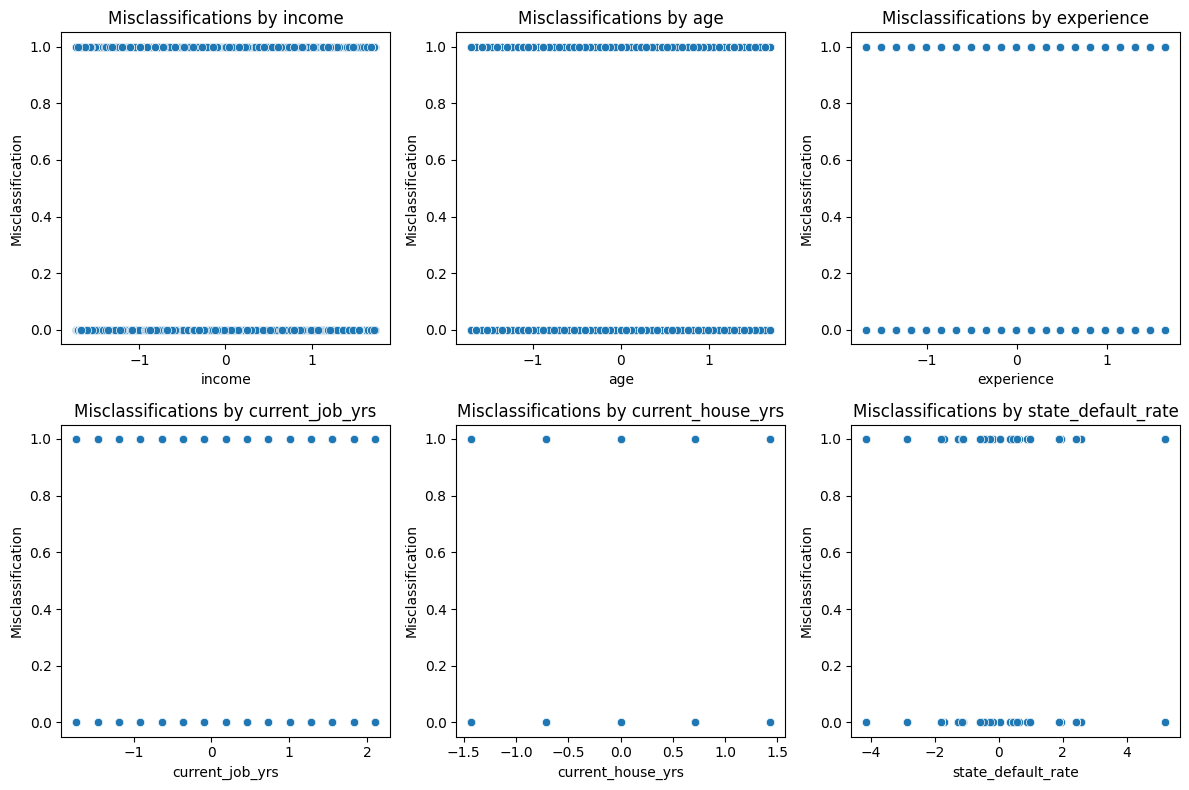

In [312]:
# Scatterplot matrix between numerical features and misclassifications
import math

# Define the number of columns for the grid
num_cols = 3  

# Calculate the number of rows needed
num_rows = math.ceil(len(numerical_columns) / num_cols)

# Set the figure size dynamically based on the grid size
plt.figure(figsize=(num_cols * 4, num_rows * 4))

# Iterate over the numerical features 
for i, feature in enumerate(numerical_columns):
    # Create a subplot in the grid 
    plt.subplot(num_rows, num_cols, i + 1)
    
    # Create a scatterplot between the current feature and the misclassifications
    sns.scatterplot(data=df_test, x=feature, y="Misclassification")
    
    # Add title and axis labels
    plt.title(f"Misclassifications by {feature}")
    plt.xlabel(f"{feature}")
    plt.ylabel("Misclassification")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

<div style="background-color:#2c699d; color:white; padding:15px; border-radius:6px;">
    <h1 style="margin:0px">Future Improvements</h1>
</div> 

**Data Enrichment**:  
To enhance the model's performance and business value, data enrichment with the following financial features is recommended:
- Loan amount 
- Loan duration
- Interest rate
- Type of loan (e.g., personal, home, vehicle)
- Existing debt
- Credit score

**Enhanced Analysis Capabilities**:  
The addition of these features, particularly loan amount, would enable more precise risk assessment and better alignment with business objectives through cost-sensitive evaluation metrics incorporating actual monetary values. Cost-sensitive metrics or expected monetary value incorporate the actual cost of defaults (false negatives) and the opportunity cost of rejecting good loans (false positives).